# COVID-19 🇮🇹

Libraries and Plotting Settings

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

In [24]:
sns.set_context("poster")

plt.rcParams["figure.figsize"] = (12,8) 
plt.rcParams["figure.dpi"] = 300

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


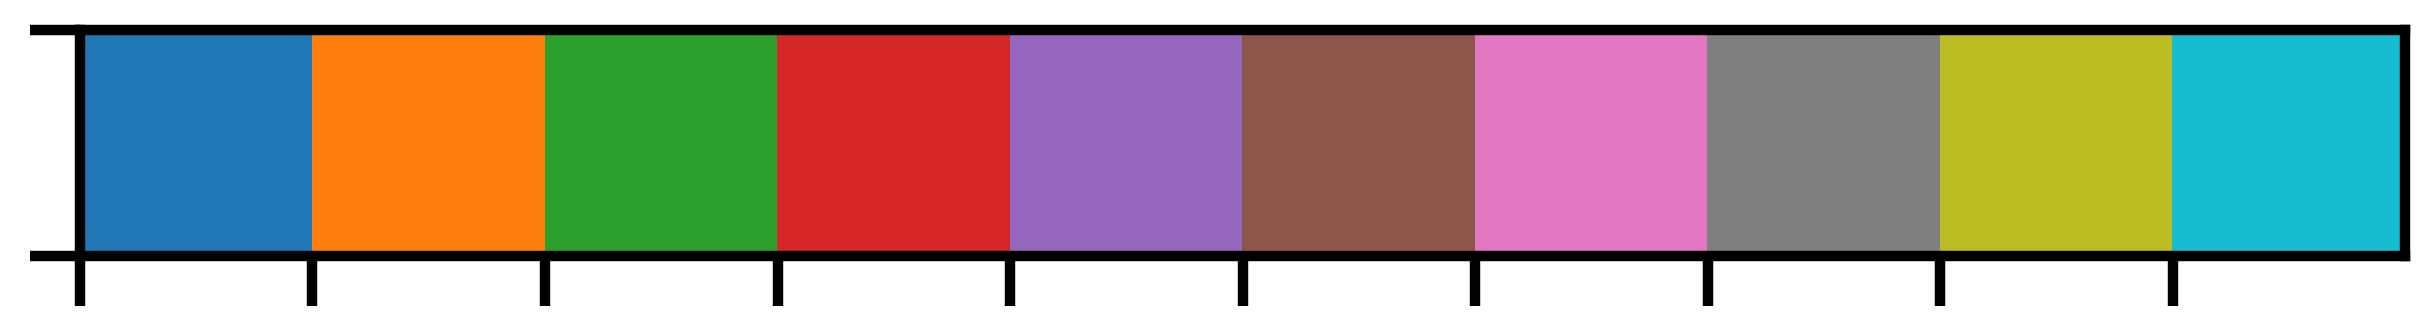

In [25]:
pal = sns.color_palette()

sns.palplot(pal)
print(pal.as_hex())

Loading data from `https://github.com/pcm-dpc/COVID-19` (Italian Protezione Civile official GitHub repository)

In [26]:
# PATH = "../COVID-19/dati-andamento-nazionale/"
# FILE = "dpc-covid19-ita-andamento-nazionale.csv"
FILE = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

In [27]:
# df = pd.read_csv(PATH+FILE, sep=',')
df = pd.read_csv(FILE, sep=',')

In [28]:
df.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN


Data pre-processing

In [29]:
df['casi_conclusi'] = df['deceduti']+df['dimessi_guariti']

# positives_yesterday = df['nuovi_attualmente_positivi']
positives_yesterday = df['nuovi_positivi']
positives_yesterday = pd.concat([pd.Series([0]), positives_yesterday])
positives_yesterday = positives_yesterday.reset_index()
del positives_yesterday['index']
positives_yesterday.drop((len(positives_yesterday)-1))
df['nuovi_positivi_ieri'] = positives_yesterday

# cases_yesterday = df['totale_attualmente_positivi']-df['nuovi_attualmente_positivi']
cases_yesterday = df['totale_positivi']-df['nuovi_positivi']
for i in range(len(cases_yesterday)):
    if (cases_yesterday[i] == 0):
#         cases_yesterday[i]=df['nuovi_attualmente_positivi'].iloc[i]
        cases_yesterday[i]=df['nuovi_positivi'].iloc[i]

df['totale_attualmente_positivi_ieri'] = cases_yesterday

# df['incremento_giornaliero_percentuale'] = (df['nuovi_attualmente_positivi']/df['totale_attualmente_positivi_ieri'])*100
df['incremento_giornaliero_percentuale'] = (df['nuovi_positivi']/df['totale_attualmente_positivi_ieri'])*100


# df['incremento_giornaliero_relativo_percentuale'] = (df['nuovi_attualmente_positivi']/df['nuovi_positivi_ieri'])*100
df['incremento_giornaliero_relativo_percentuale'] = (df['nuovi_positivi']/df['nuovi_positivi_ieri'])*100

ICU_yesterday = df['terapia_intensiva']
ICU_yesterday = pd.concat([pd.Series([0]), ICU_yesterday])
ICU_yesterday = ICU_yesterday.reset_index()
del ICU_yesterday['index']
ICU_yesterday.drop((len(ICU_yesterday)-1))
df['terapia_intensiva_ieri'] = ICU_yesterday

df['incremento_ICU_relativo_percentuale'] = ((df['terapia_intensiva']-df['terapia_intensiva_ieri'])/df['terapia_intensiva_ieri'])*100

hospitalization_yesterday = df['totale_ospedalizzati']
hospitalization_yesterday = pd.concat([pd.Series([0]), hospitalization_yesterday])
hospitalization_yesterday = hospitalization_yesterday.reset_index()
del hospitalization_yesterday['index']
hospitalization_yesterday.drop((len(hospitalization_yesterday)-1))
df['totale_ospedalizzati_ieri'] = hospitalization_yesterday

df['incremento_ospitalizzati_relativo_percentuale'] = ((df['totale_ospedalizzati']-df['totale_ospedalizzati_ieri'])/df['totale_ospedalizzati_ieri'])*100

deceased_yesterday = df['deceduti']
deceased_yesterday = pd.concat([pd.Series([0]), deceased_yesterday])
deceased_yesterday = deceased_yesterday.reset_index()
del deceased_yesterday['index']
deceased_yesterday.drop((len(deceased_yesterday)-1))
df['deceduti_ieri'] = deceased_yesterday

df['incremento_decessi_relativo_percentuale'] = ((df['deceduti']-df['deceduti_ieri'])/df['deceduti_ieri'])*100

home_isolation_yesterday = df['isolamento_domiciliare']
home_isolation_yesterday = pd.concat([pd.Series([0]), home_isolation_yesterday])
home_isolation_yesterday = home_isolation_yesterday.reset_index()
del home_isolation_yesterday['index']
home_isolation_yesterday.drop((len(home_isolation_yesterday)-1))
df['isolamento_domiciliare_ieri'] = home_isolation_yesterday

df['incremento_isolamento_domiciliare_relativo_percentuale'] = ((df['isolamento_domiciliare']-df['isolamento_domiciliare_ieri'])/df['isolamento_domiciliare_ieri'])*100

df = df.replace([np.inf, -np.inf], 0)

In [30]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,incremento_giornaliero_percentuale,incremento_giornaliero_relativo_percentuale,terapia_intensiva_ieri,incremento_ICU_relativo_percentuale,totale_ospedalizzati_ieri,incremento_ospitalizzati_relativo_percentuale,deceduti_ieri,incremento_decessi_relativo_percentuale,isolamento_domiciliare_ieri,incremento_isolamento_domiciliare_relativo_percentuale
276,2020-11-26T17:00:00,ITA,34038,3846,37884,757961,795845,4148,29003,661180,...,3.782135,112.184273,3848,-0.051975,38161,-0.725872,52028,1.579919,753536,0.587231
277,2020-11-27T17:00:00,ITA,33684,3782,37466,750427,787893,-7952,28352,696647,...,3.732781,97.755405,3846,-1.664067,37884,-1.103368,52850,1.564806,757961,-0.993983
278,2020-11-28T17:00:00,ITA,33299,3762,37061,752247,789308,1415,26323,720861,...,3.450002,92.843538,3782,-0.528821,37466,-1.080980,53677,1.278015,750427,0.242529
279,2020-11-29T17:00:00,ITA,32879,3753,36632,759139,795771,6463,20648,734503,...,2.663835,78.440907,3762,-0.239234,37061,-1.157551,54363,0.995162,752247,0.916188
280,2020-11-30T17:00:00,ITA,33187,3744,36931,751540,788471,-7300,16377,757507,...,2.121115,79.315188,3753,-0.239808,36632,0.816226,54904,1.223955,759139,-1.001002


In [31]:
# list(df.columns)

# Analysis

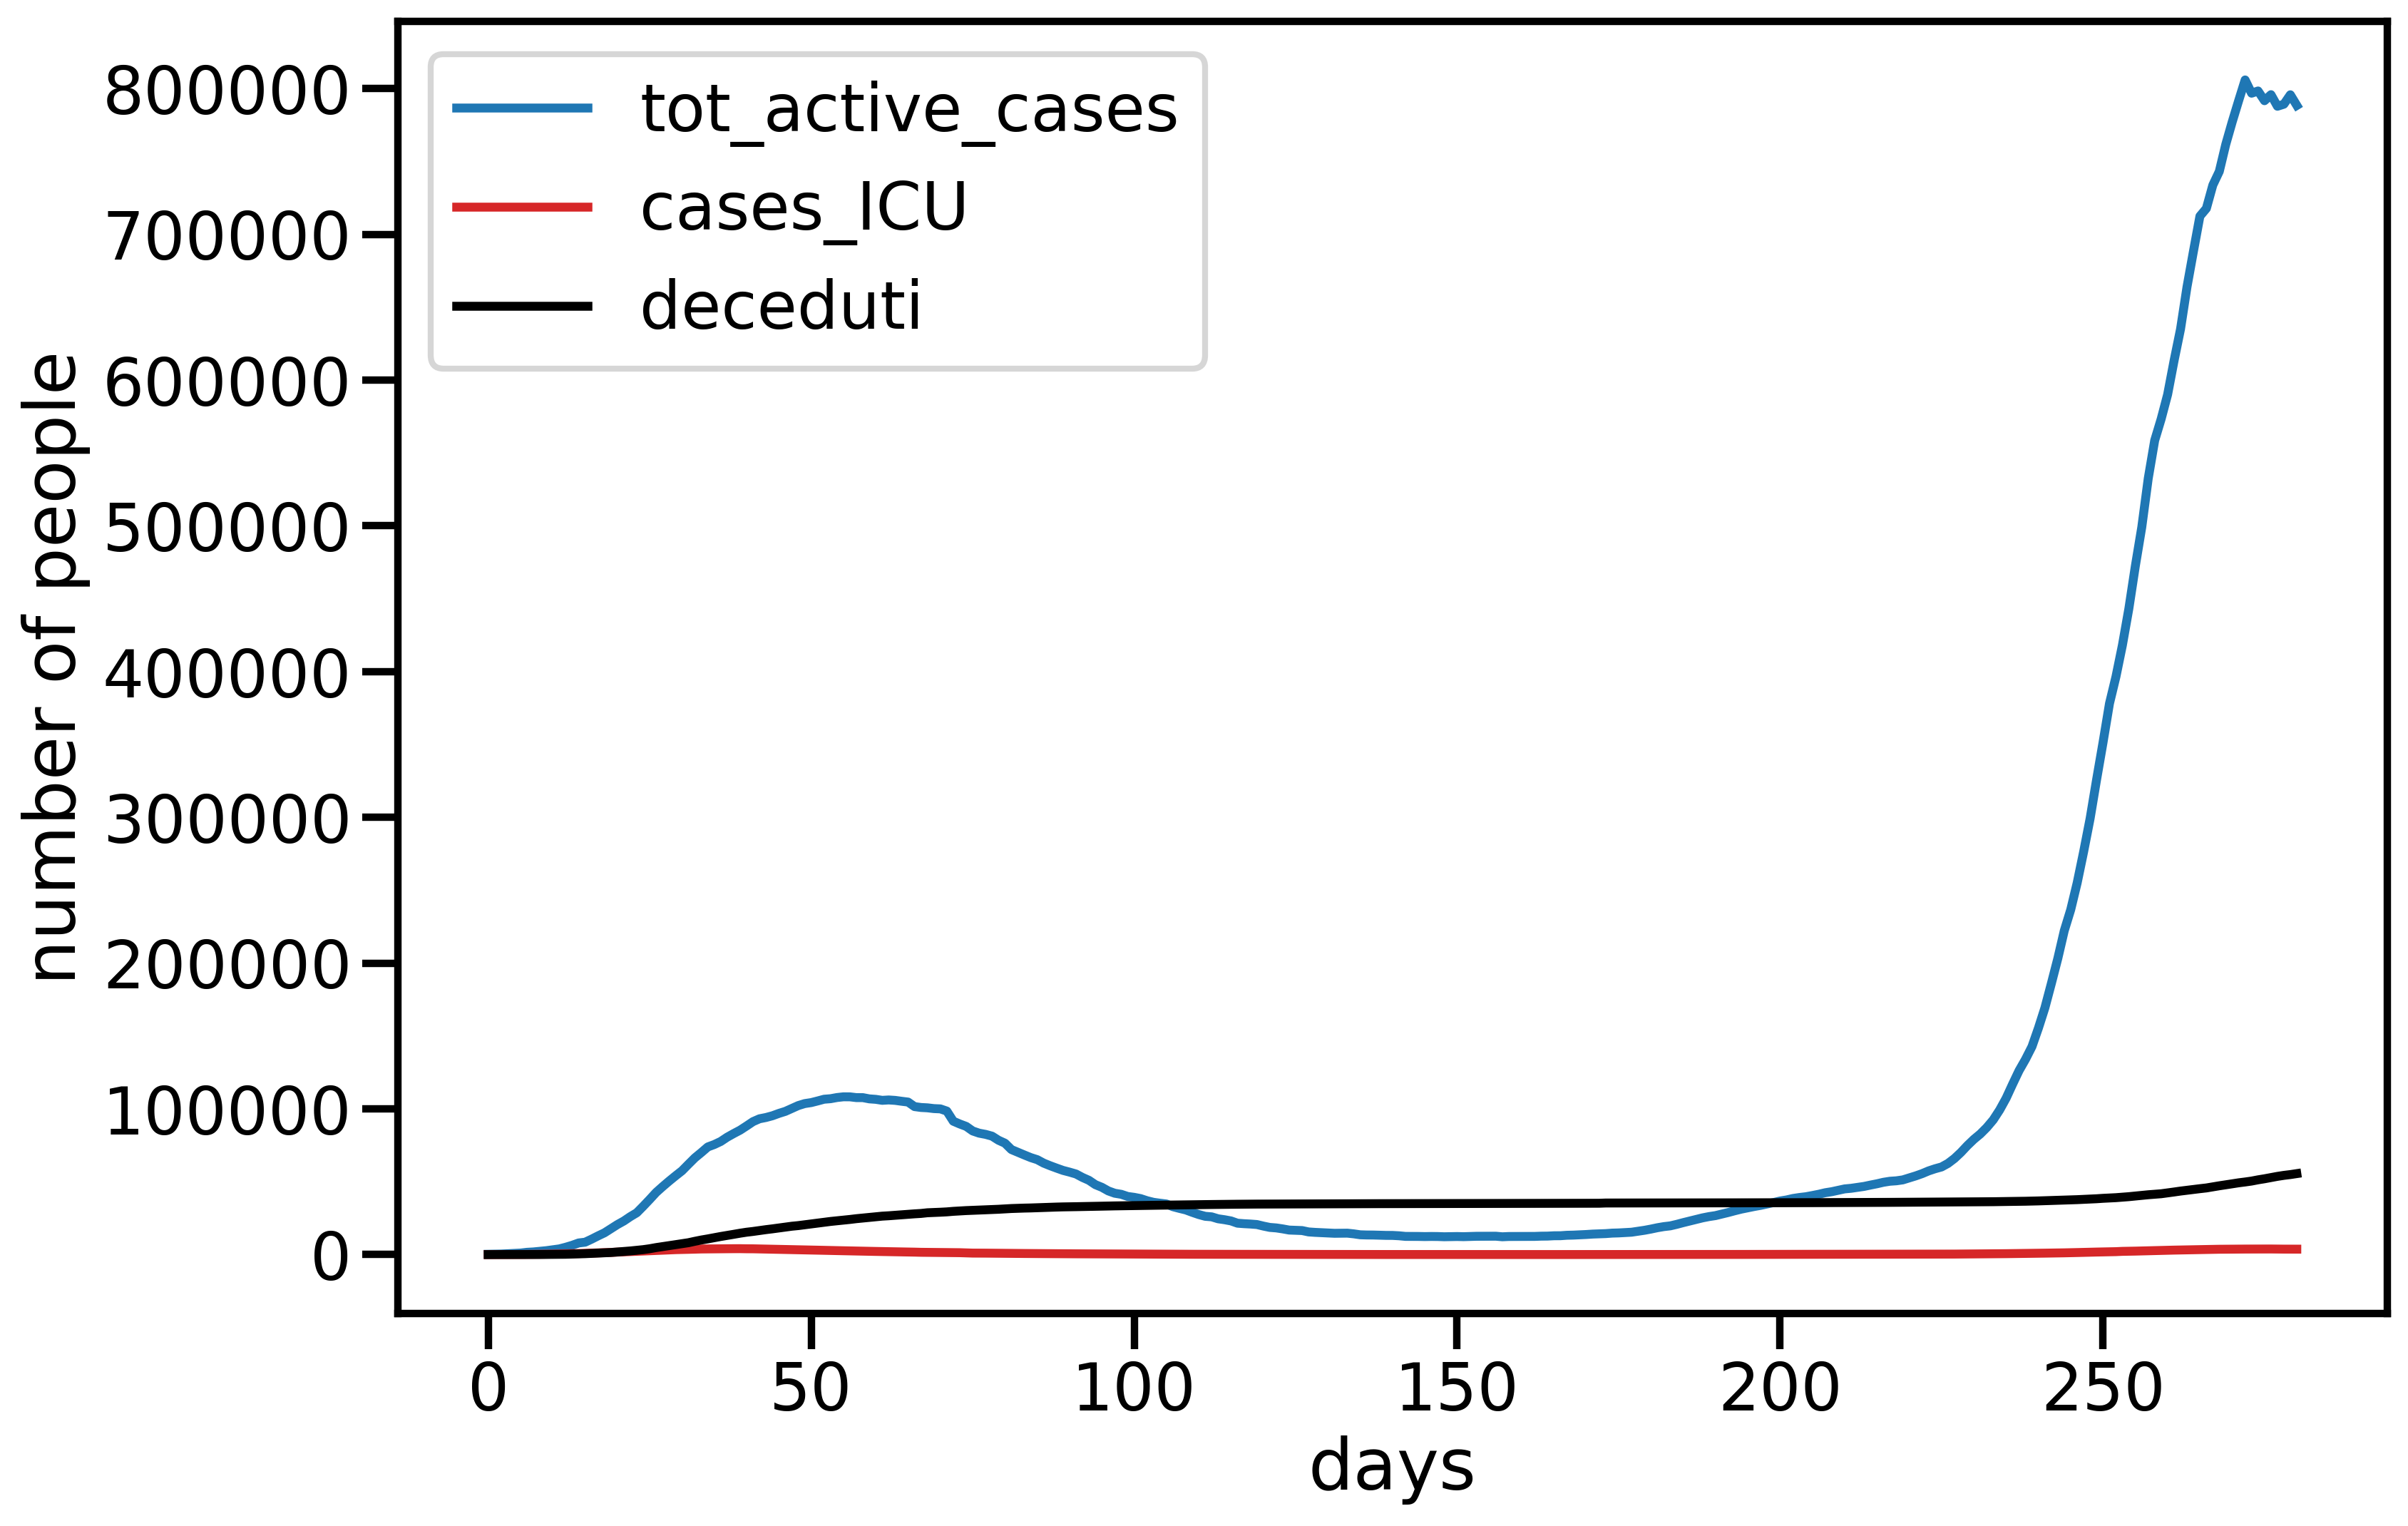

In [32]:
# df['totale_attualmente_positivi'].plot(label='tot_active_cases')
df['totale_positivi'].plot(label='tot_active_cases')

df['terapia_intensiva'].plot(label='cases_ICU', color='#d62728')

df['deceduti'].plot(label='deceduti', color='black')

plt.xlabel('days')
plt.ylabel('number of people')

plt.legend()

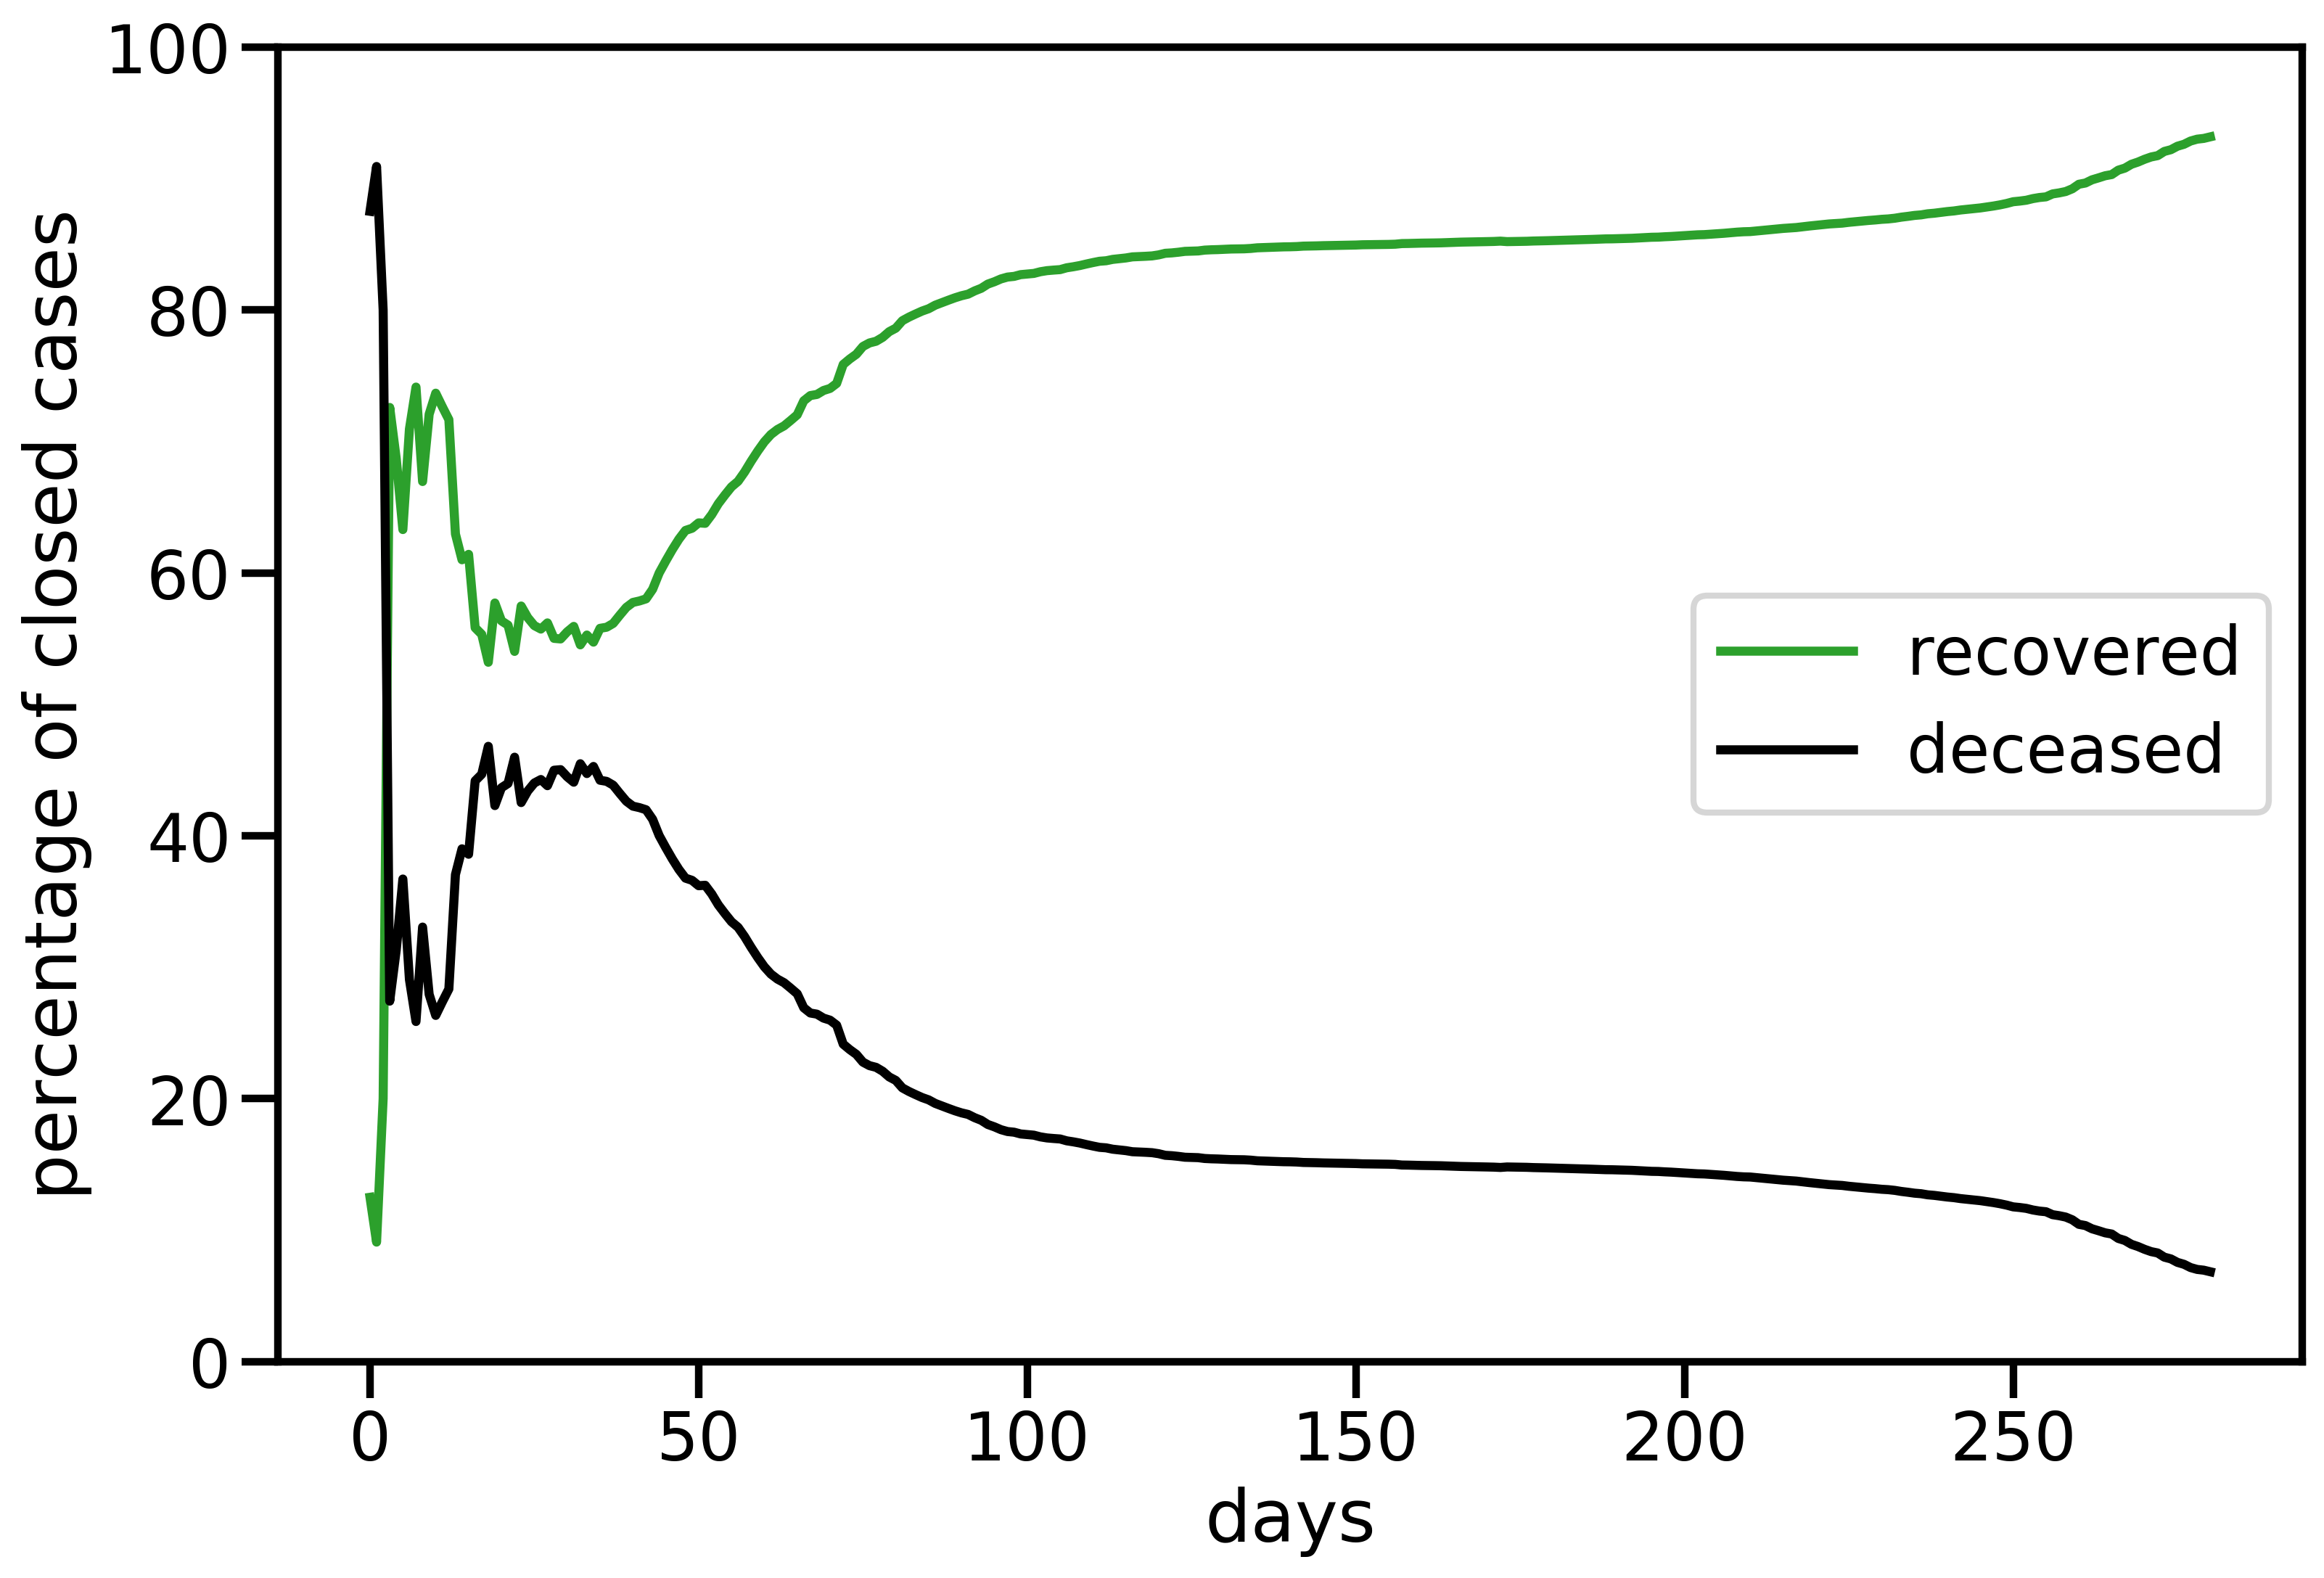

In [33]:
plt.plot((df['dimessi_guariti']/df['casi_conclusi'])*100, label='recovered', color='#2ca02c')
plt.plot((df['deceduti']/df['casi_conclusi'])*100, label='deceased', color='black')
plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of closed cases')

plt.legend()

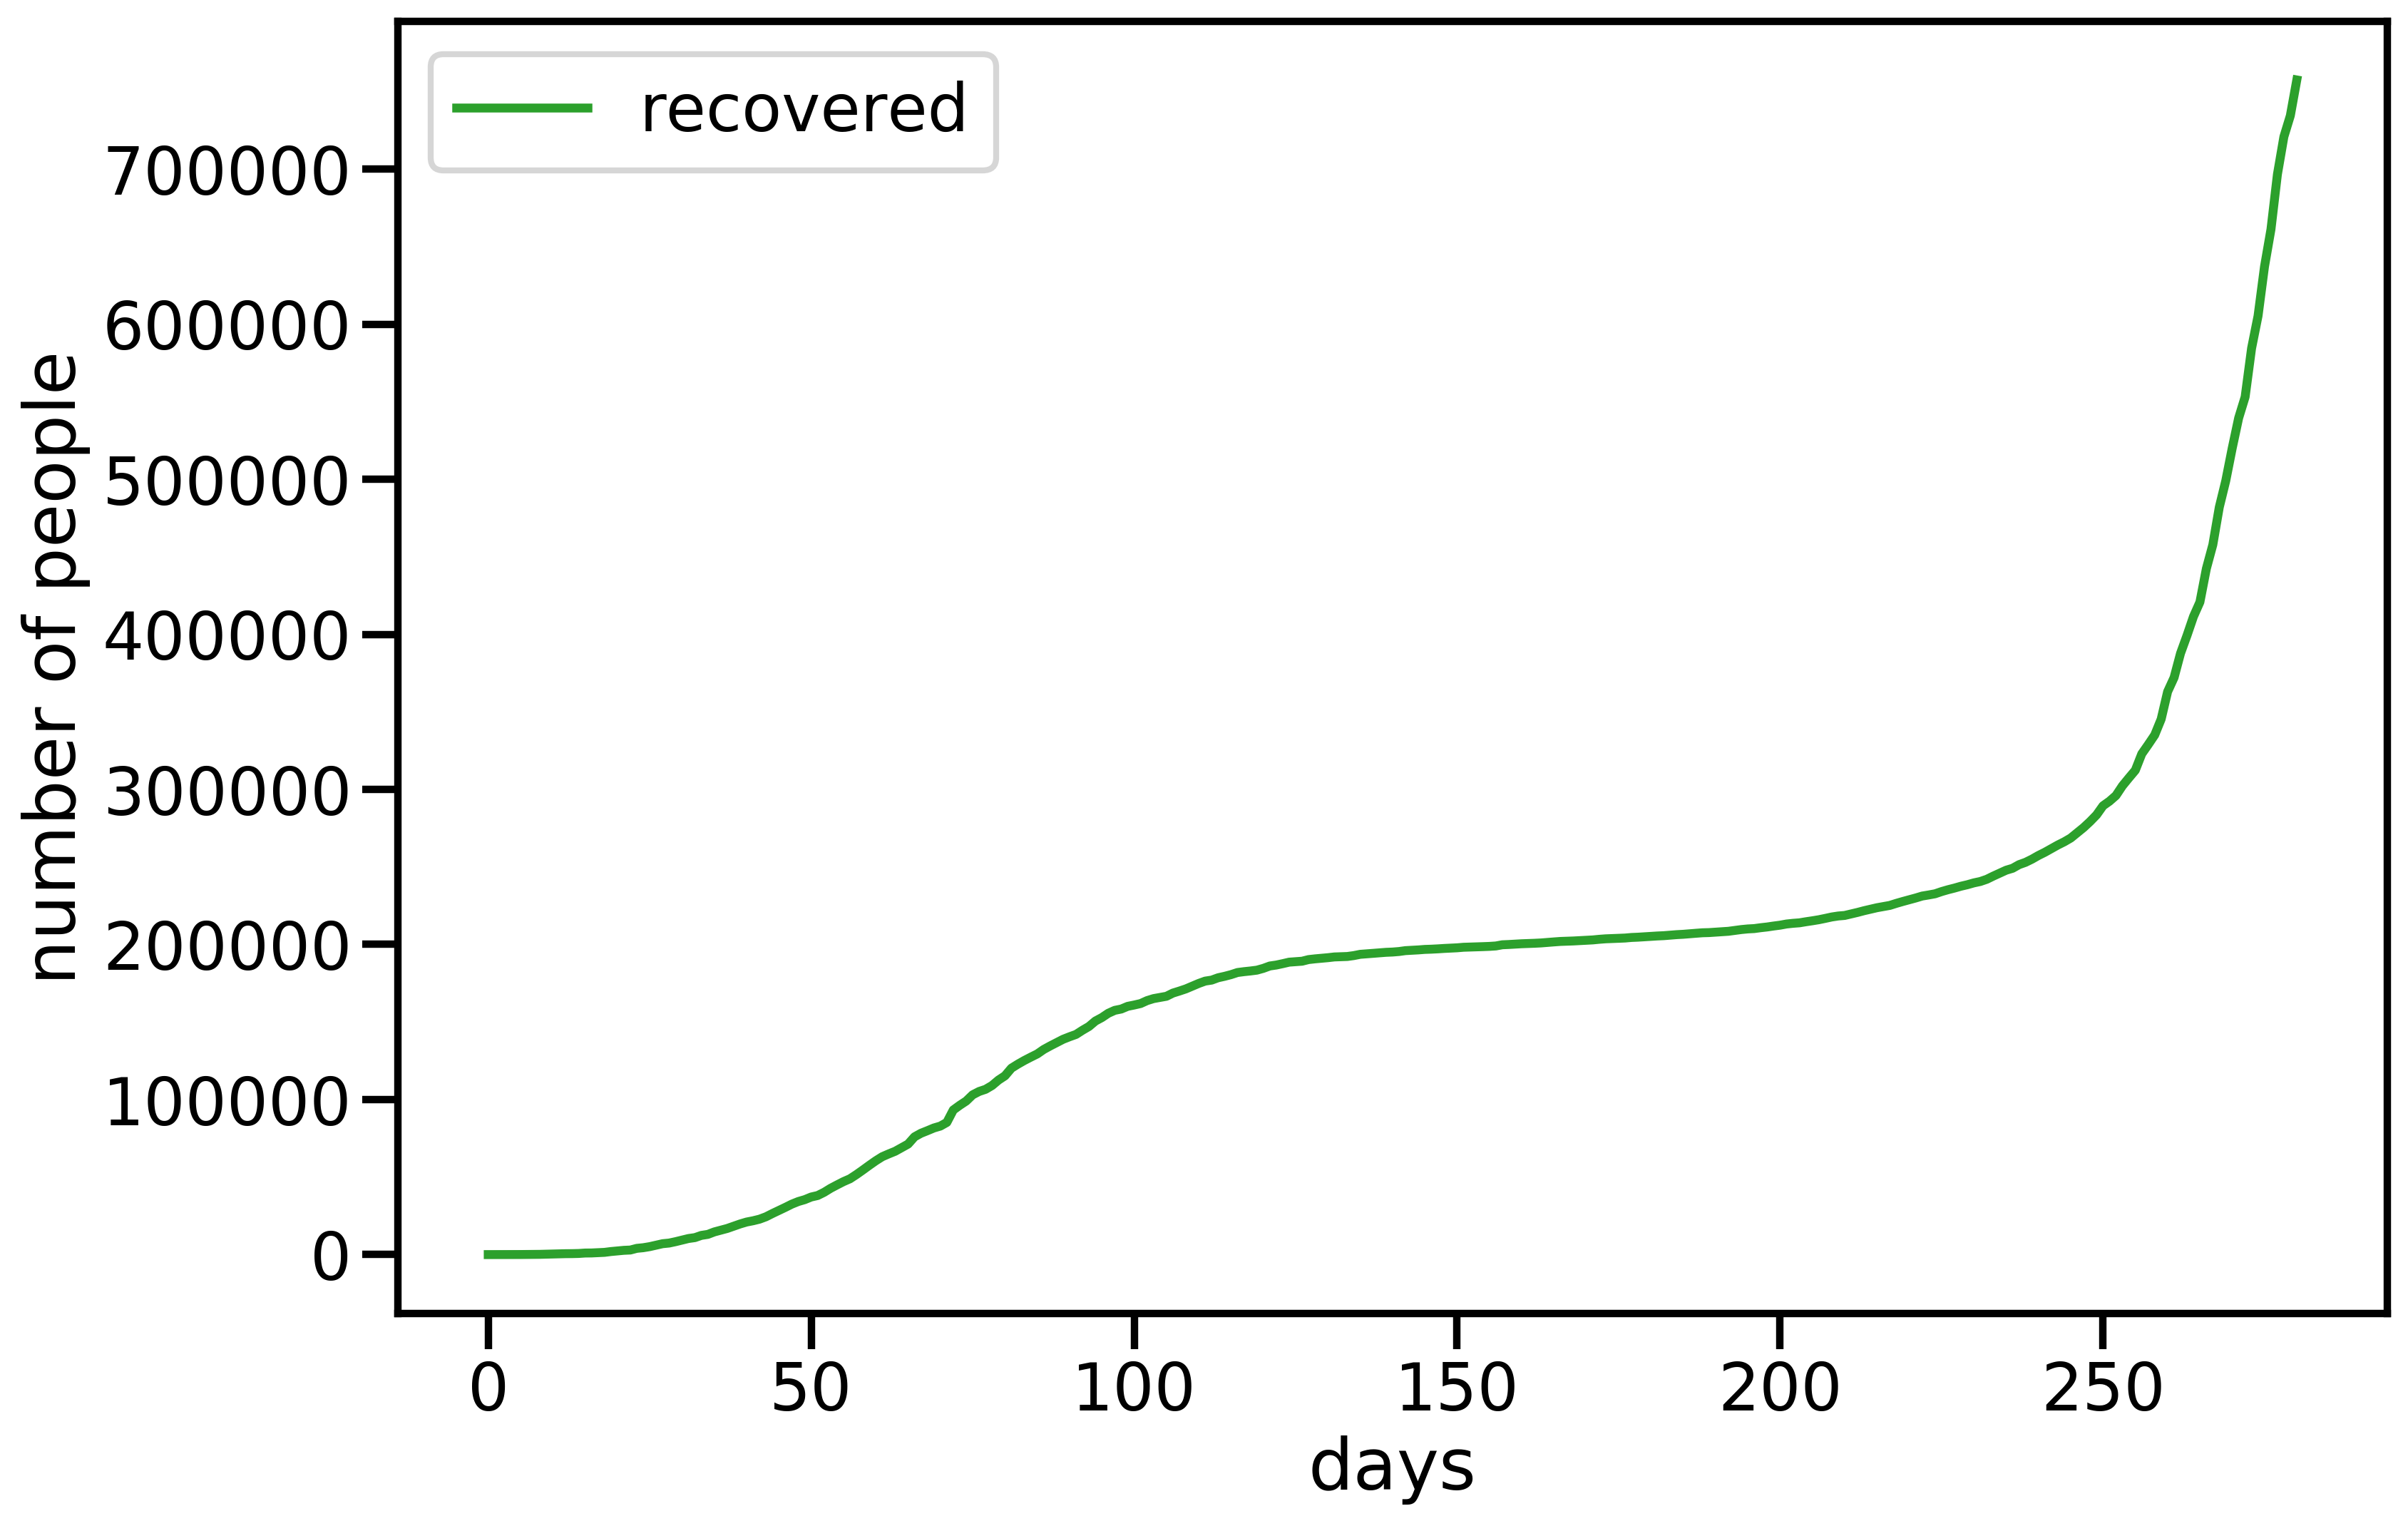

In [34]:
plt.plot(df['dimessi_guariti'], label='recovered', color='#2ca02c')

plt.xlabel('days')
plt.ylabel('number of people')

plt.legend()

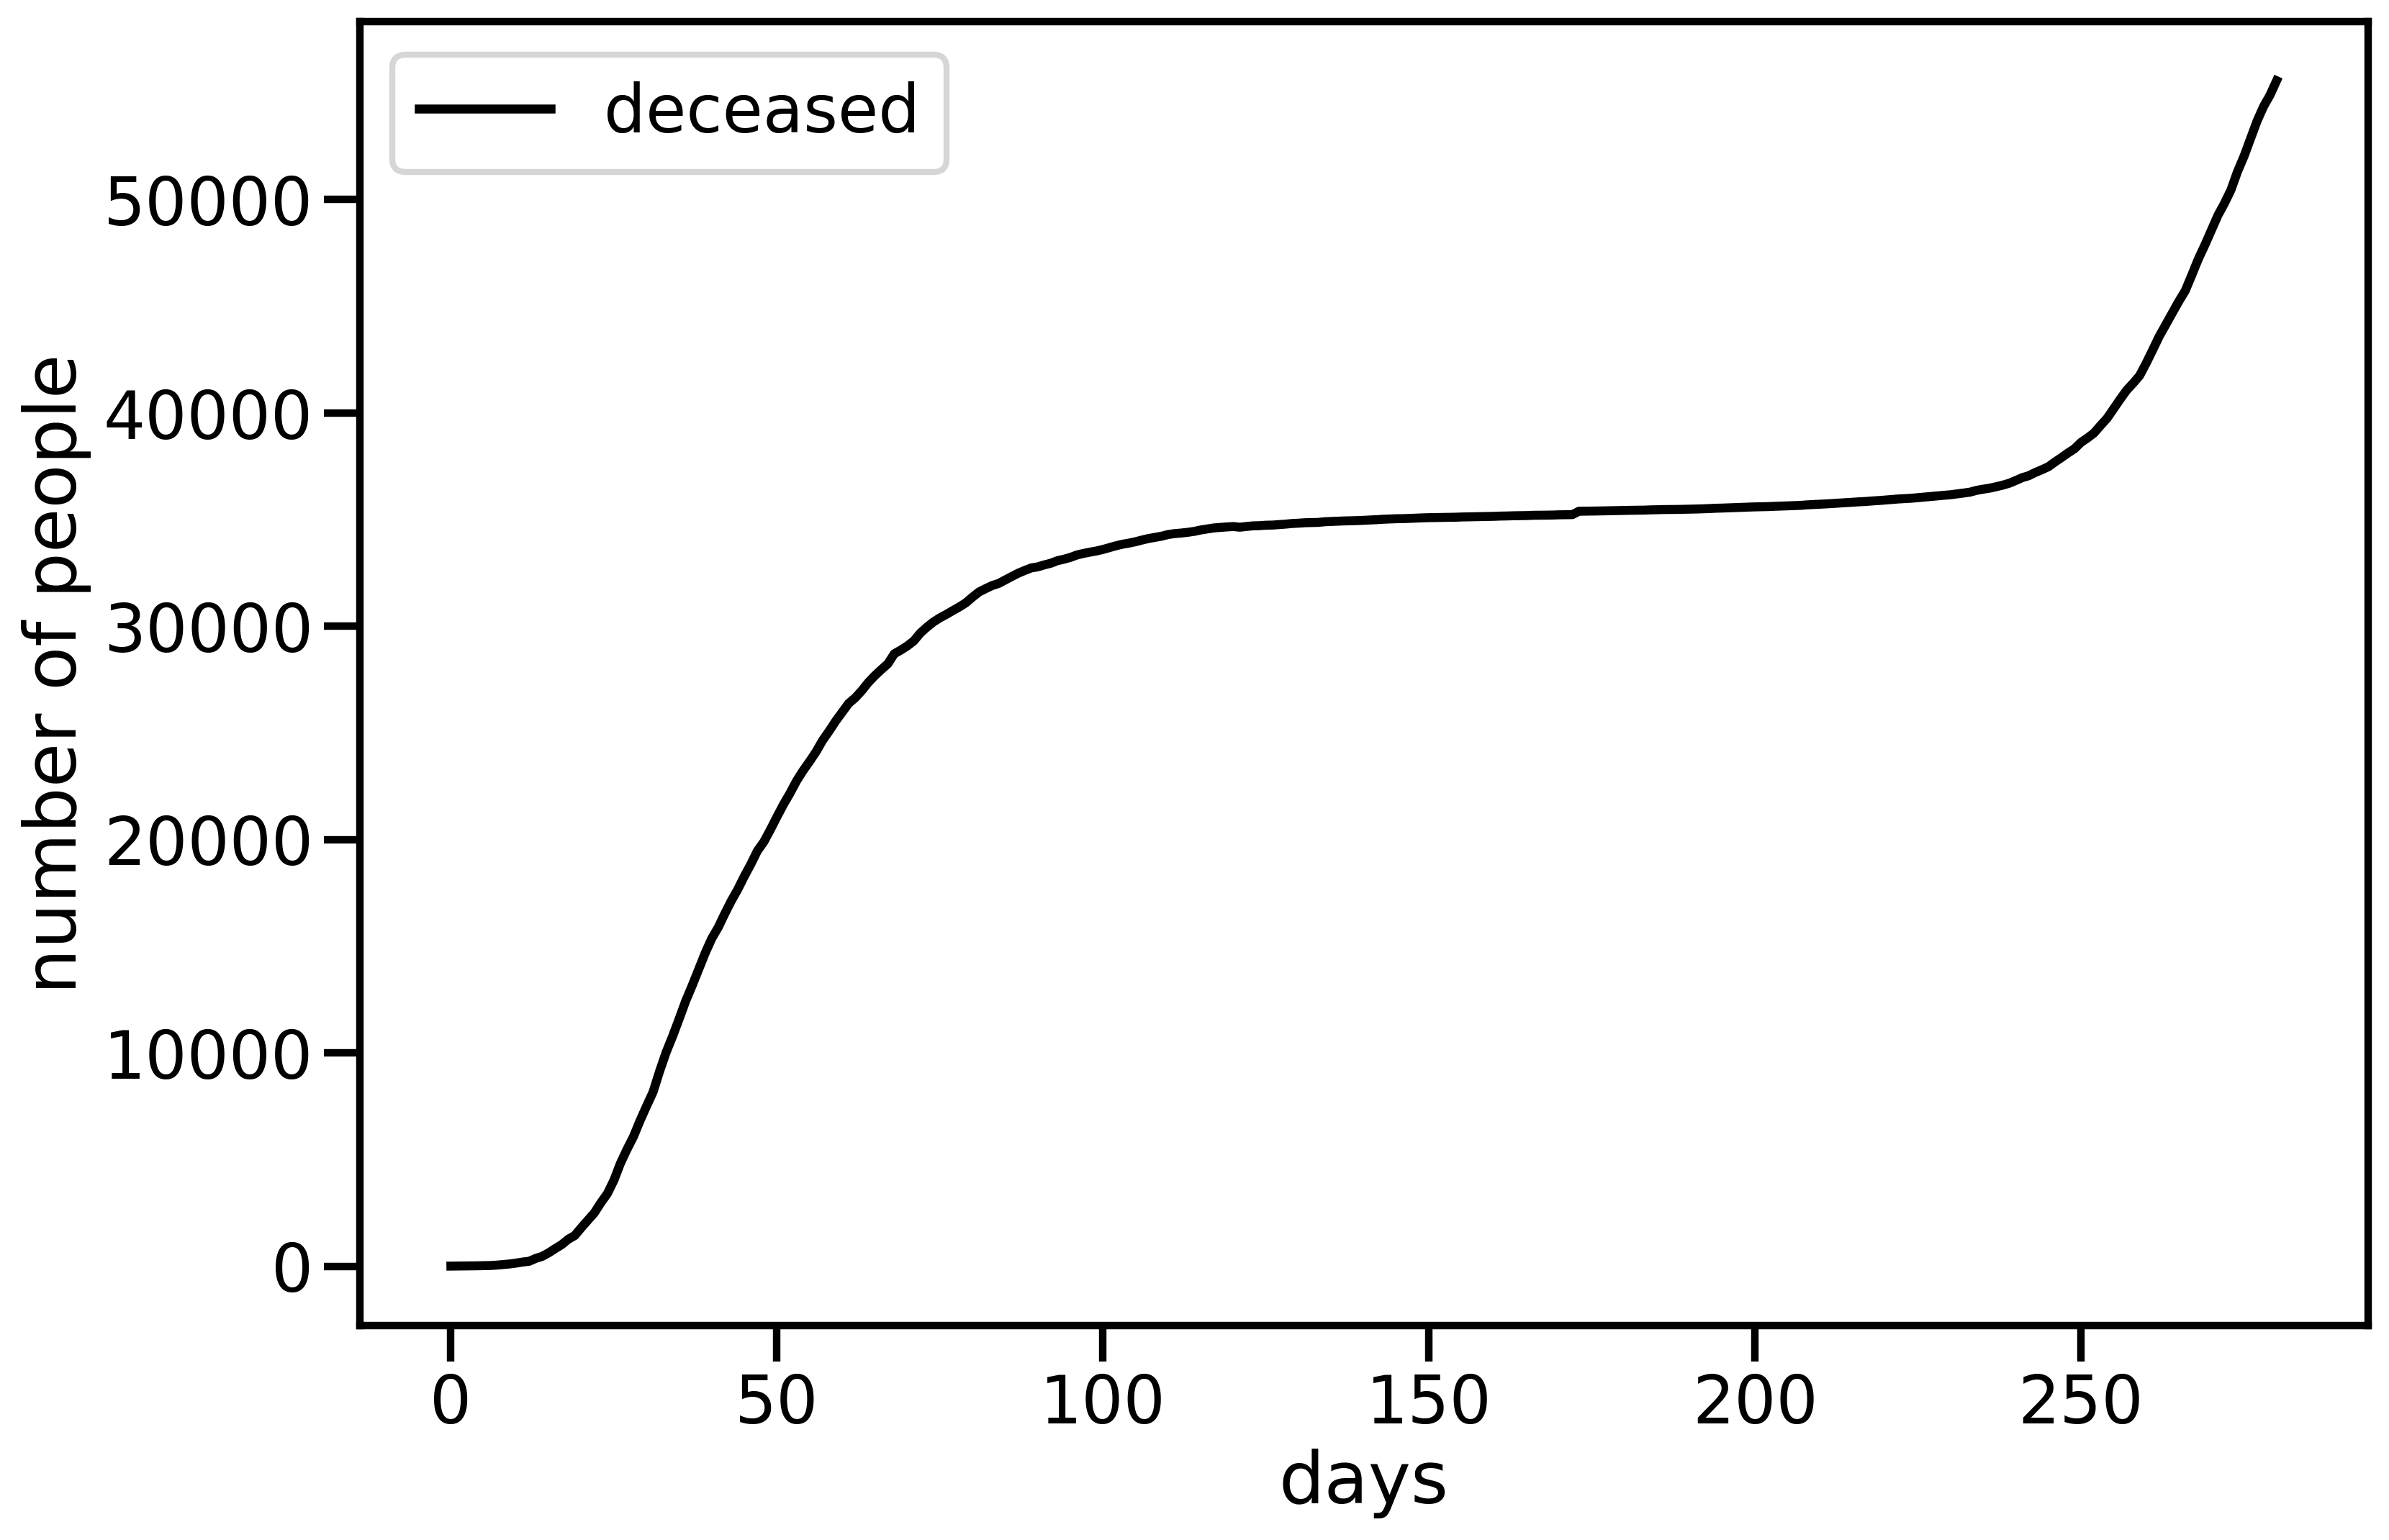

In [35]:
plt.plot(df['deceduti'], label='deceased', color='black')

plt.xlabel('days')
plt.ylabel('number of people')

plt.legend()

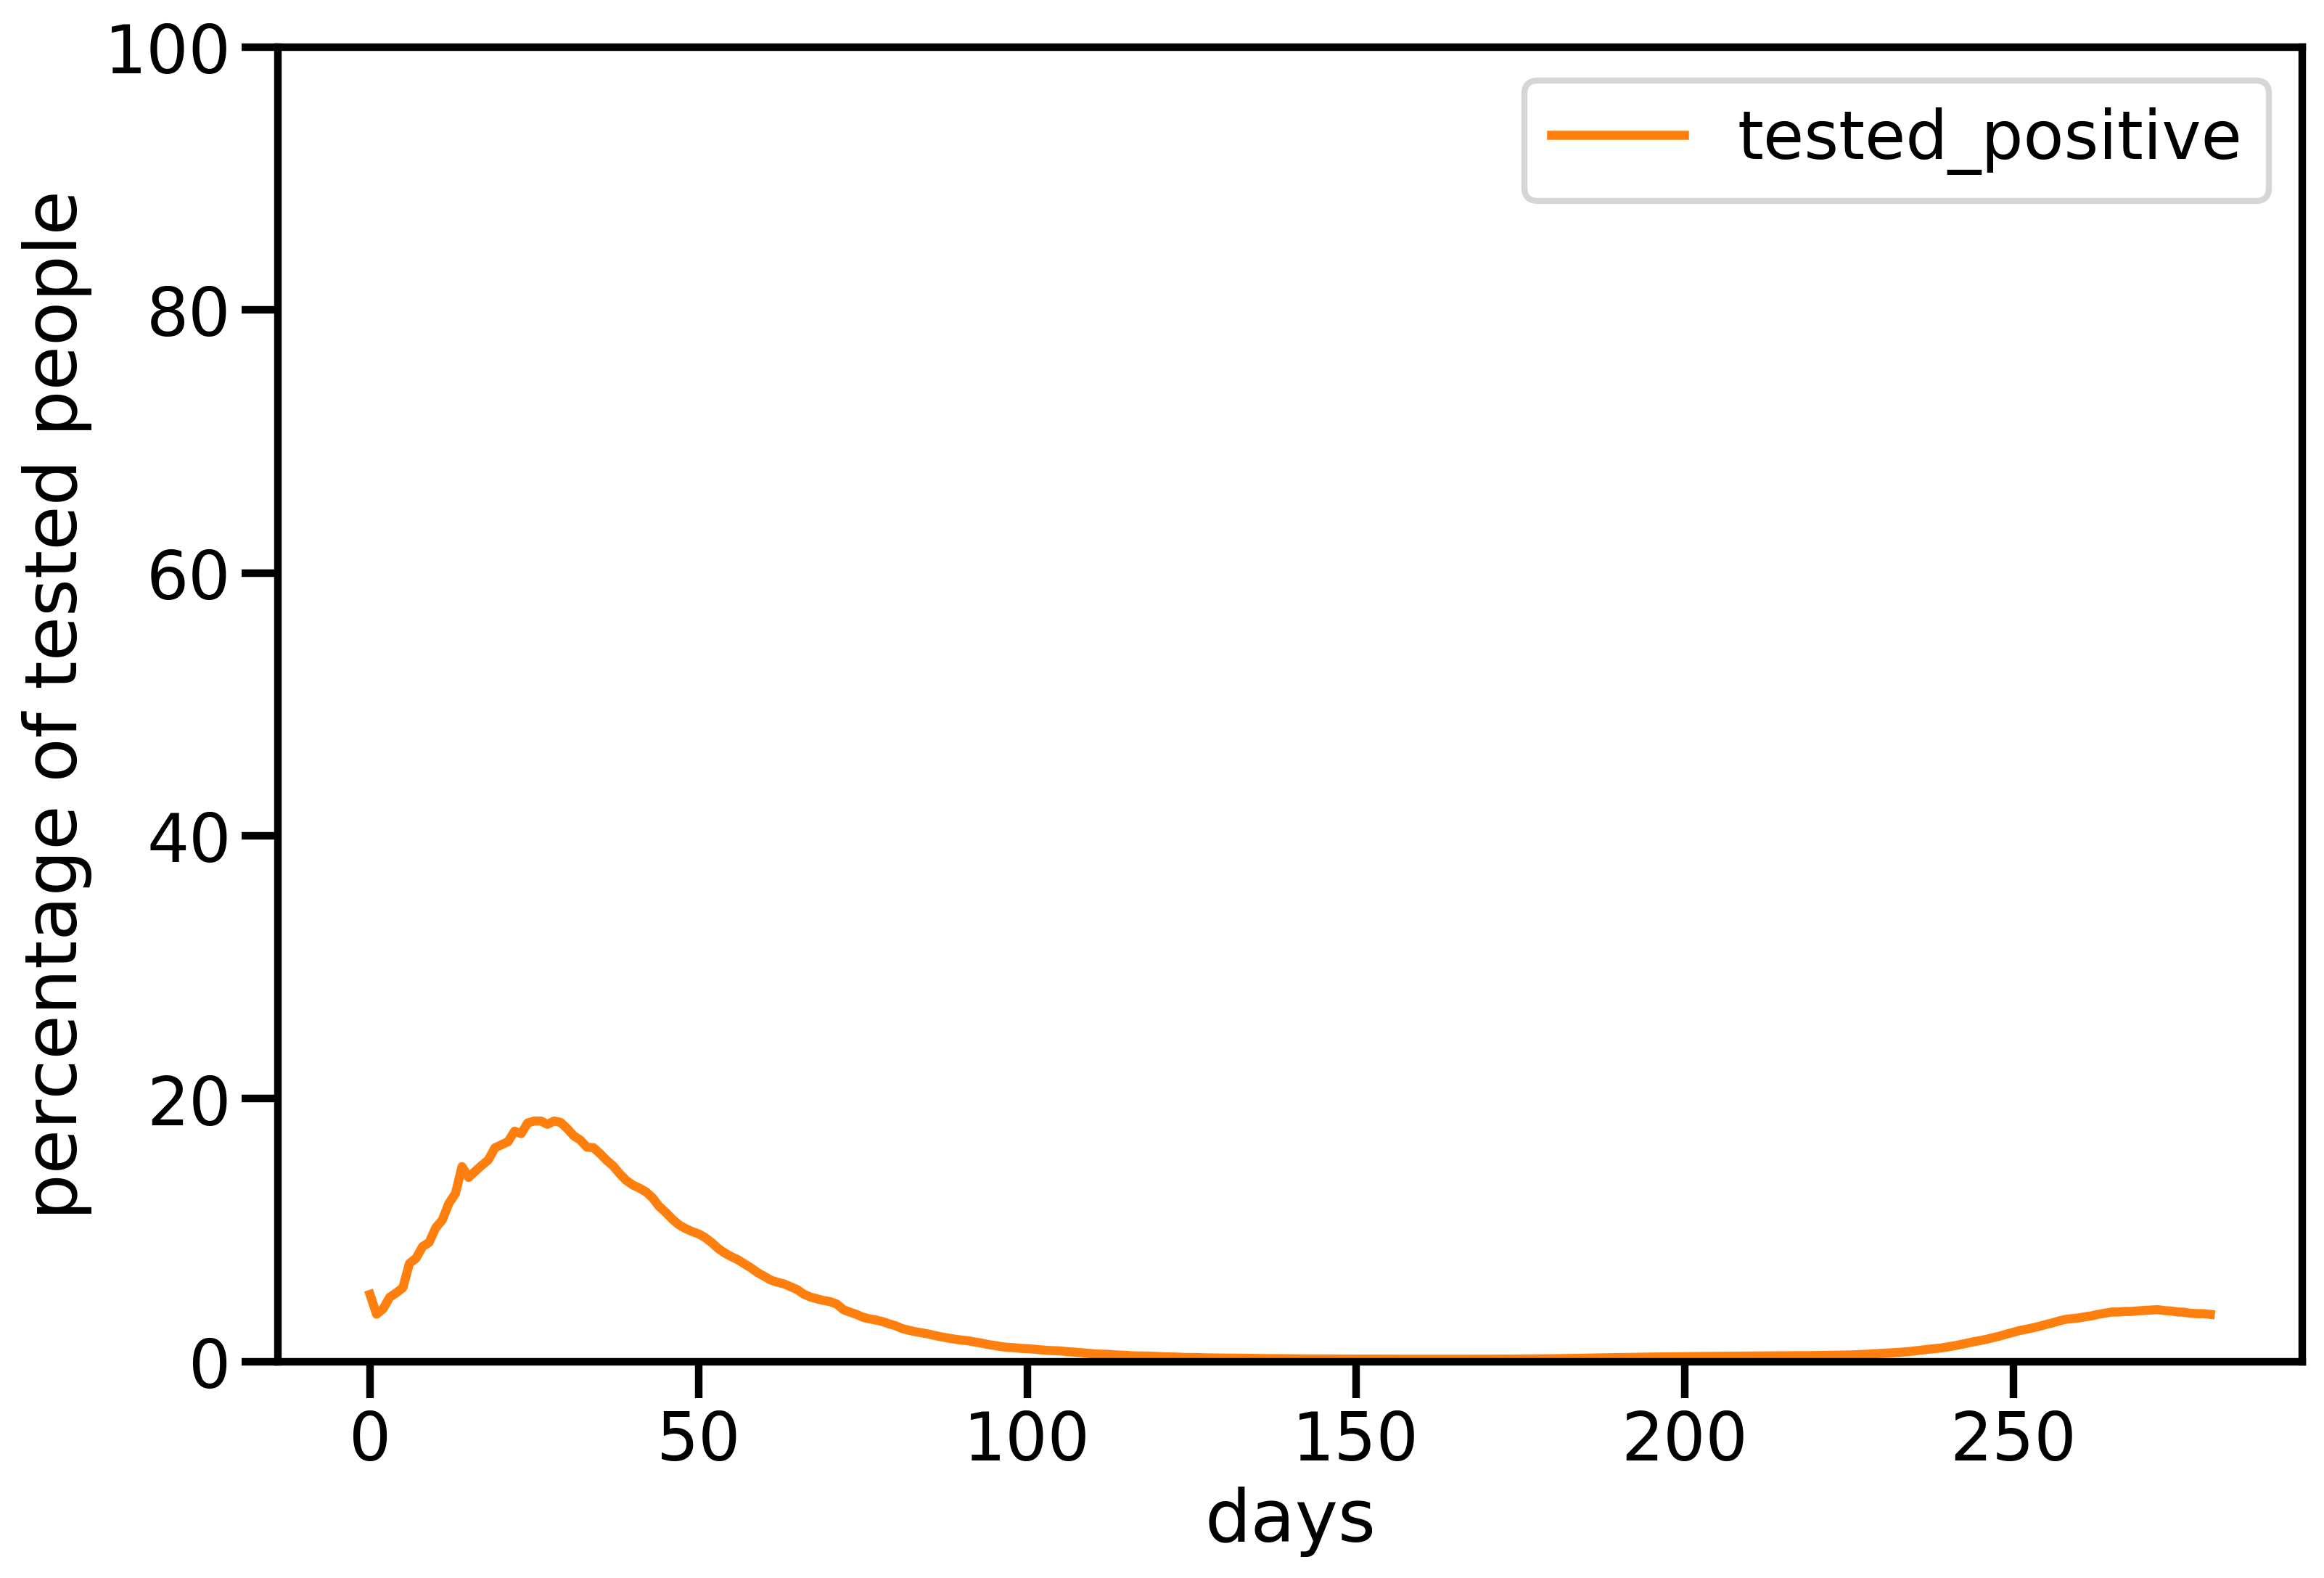

In [36]:
# plt.plot((df['totale_attualmente_positivi']/df['tamponi'])*100, label='tested_positive', color='#ff7f0e')
plt.plot((df['totale_positivi']/df['tamponi'])*100, label='tested_positive', color='#ff7f0e')


plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of tested people')

plt.legend()

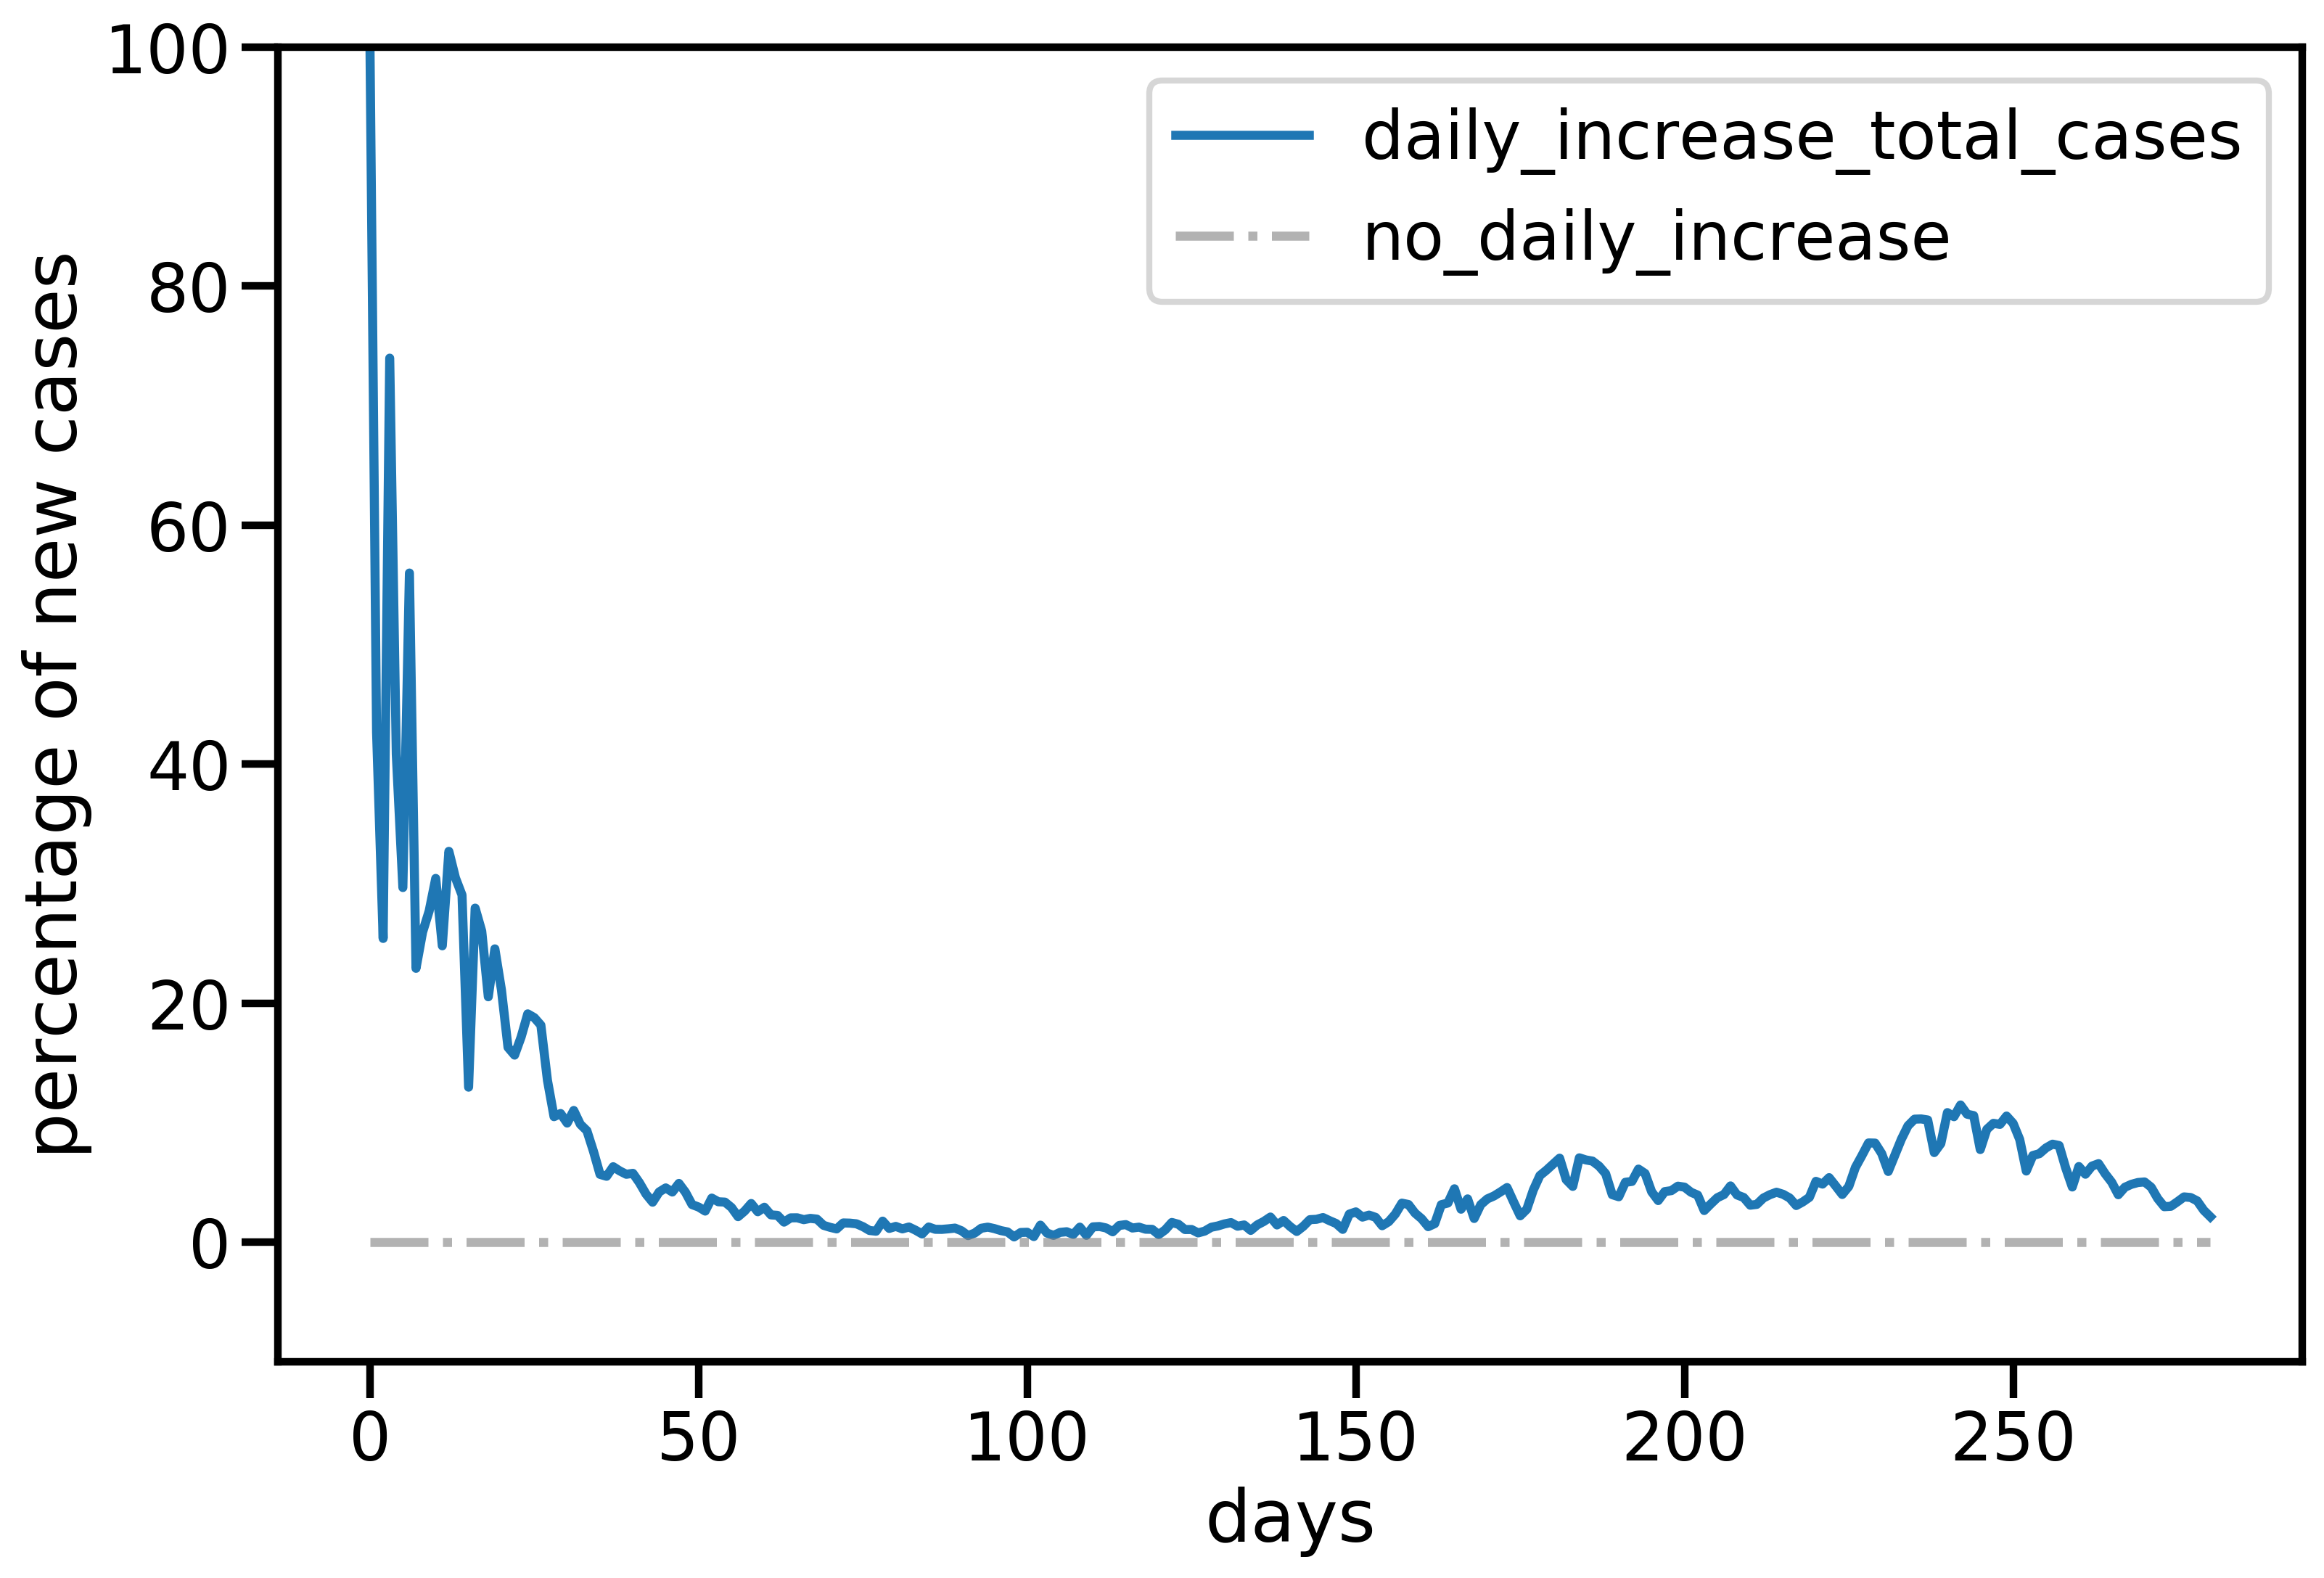

In [37]:
df['incremento_giornaliero_percentuale'].plot(label='daily_increase_total_cases')
plt.plot(np.repeat(0, len(df)), label='no_daily_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

plt.ylim(-10,100)

plt.xlabel('days')
plt.ylabel('percentage of new cases')

plt.legend()

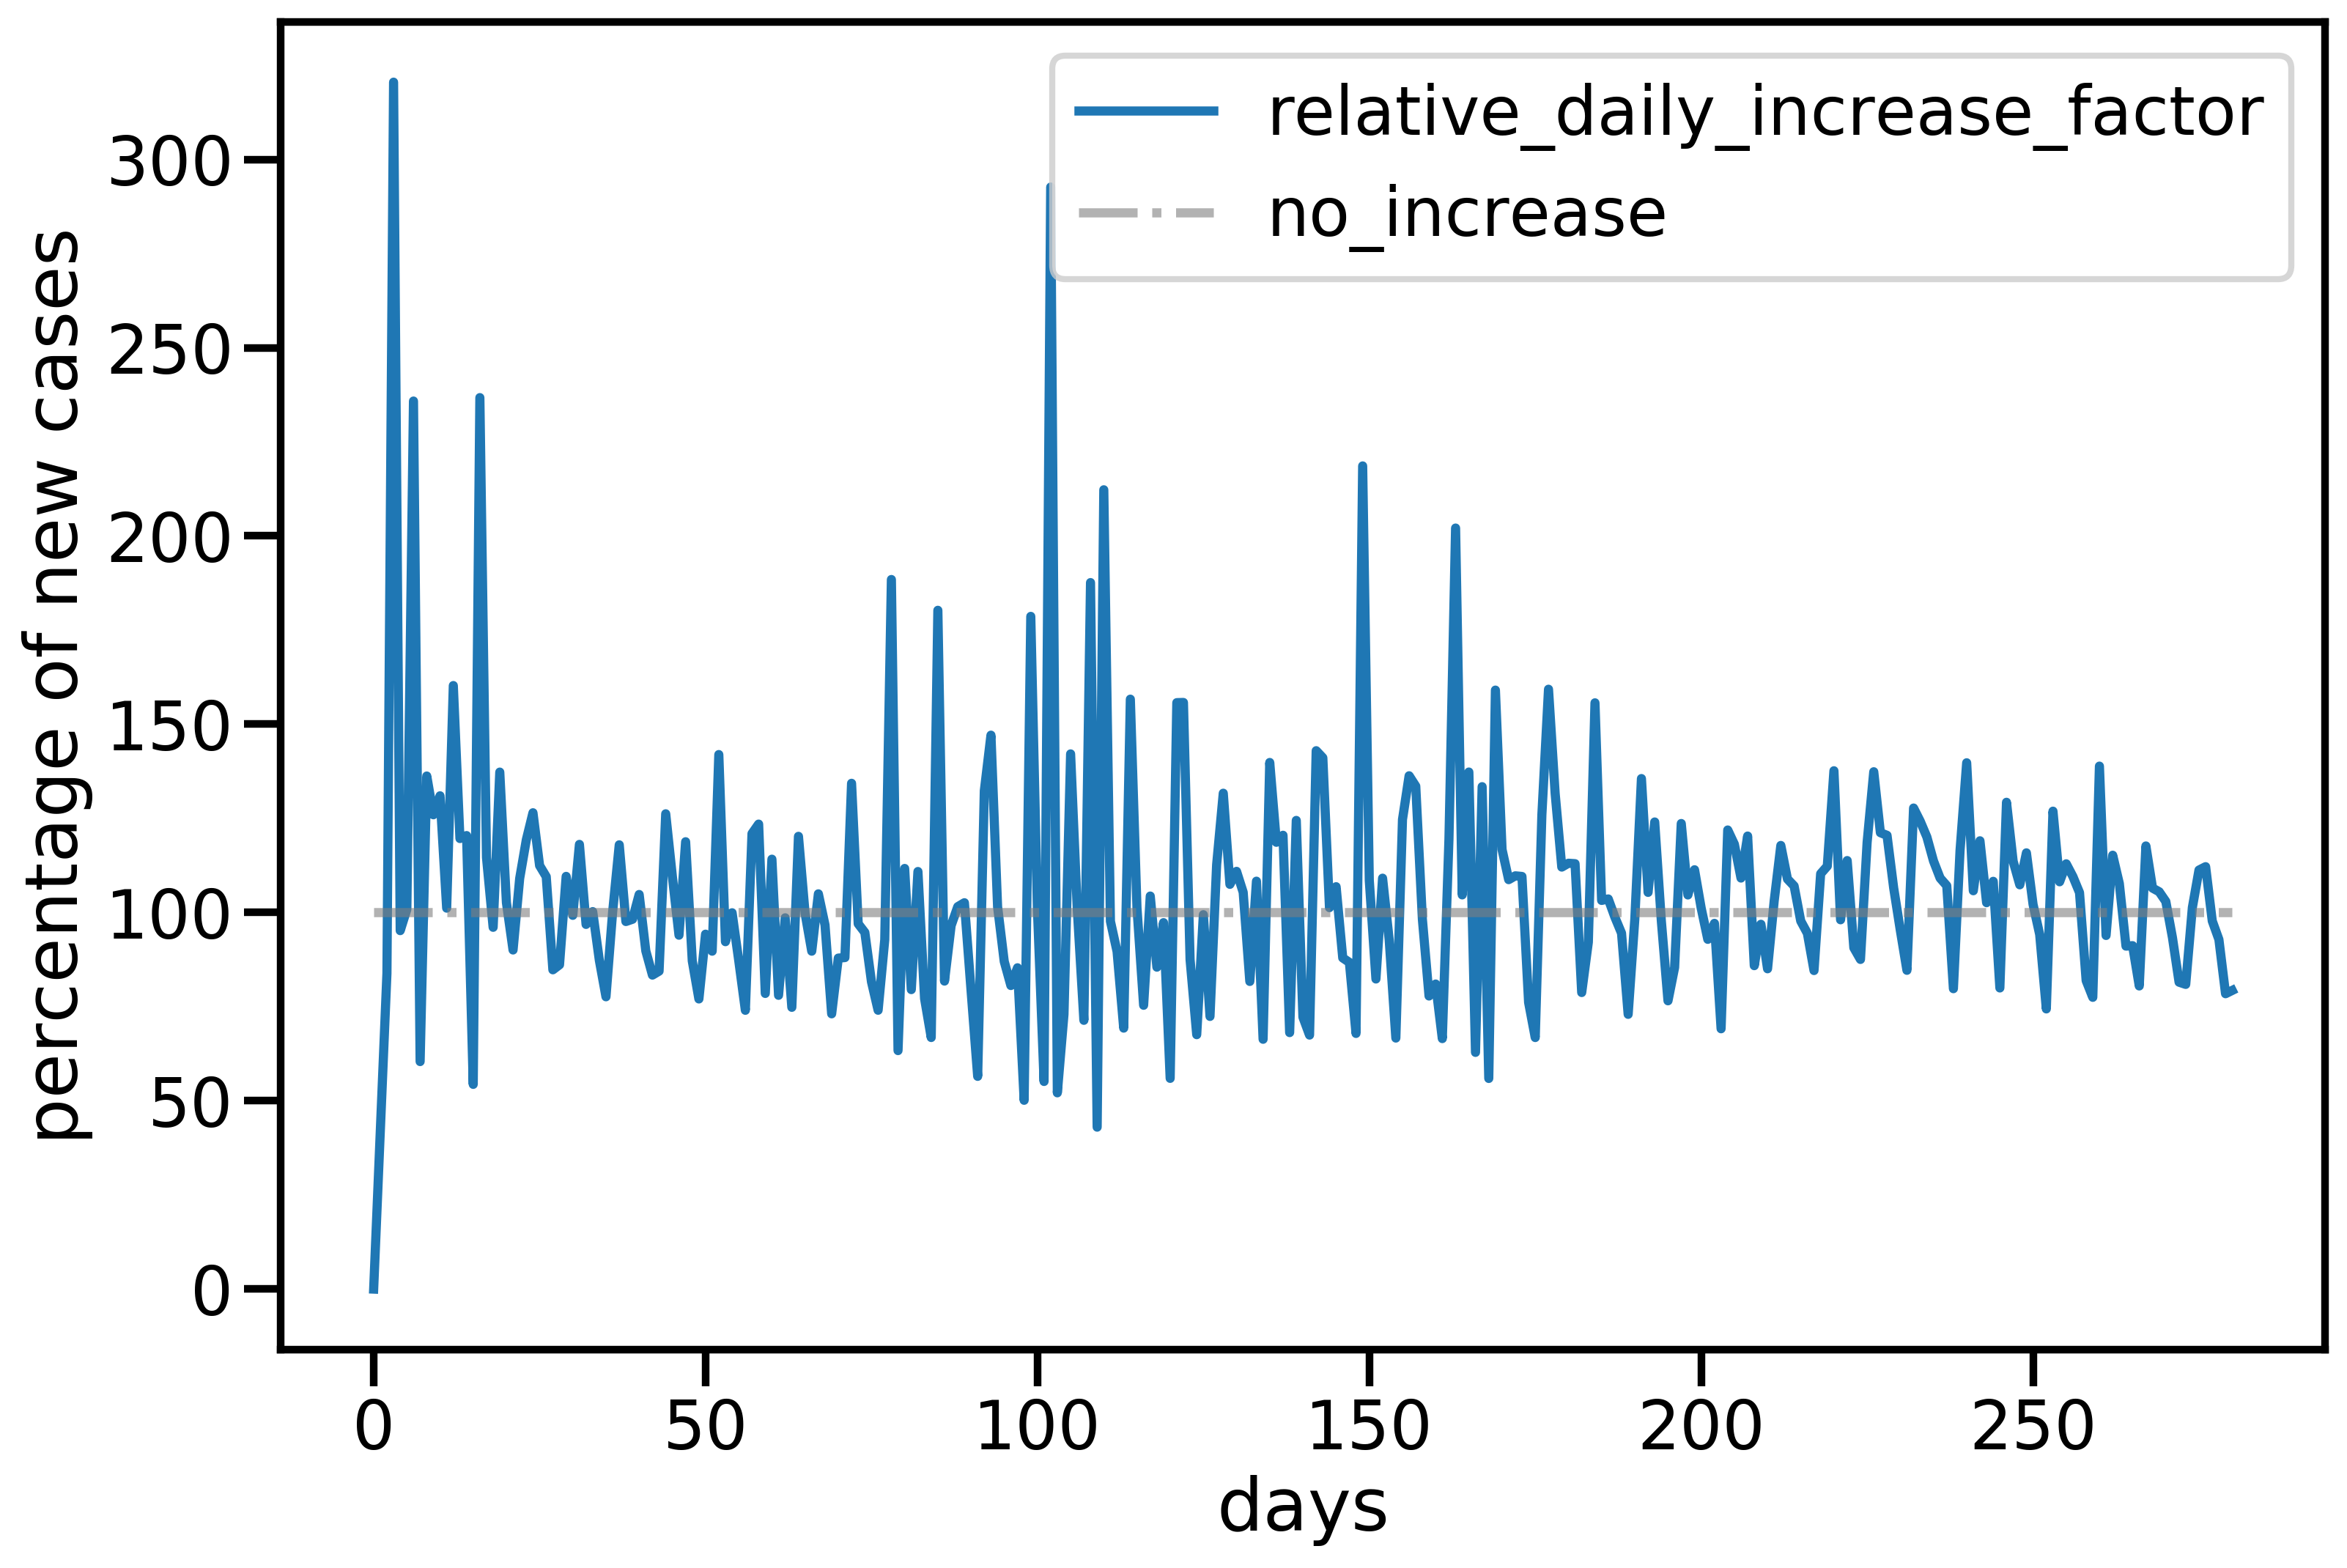

In [38]:
df['incremento_giornaliero_relativo_percentuale'].plot(label='relative_daily_increase_factor')
plt.plot(np.repeat(100, len(df)), label='no_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

# plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of new cases')

# plt.yscale('log')

plt.legend()

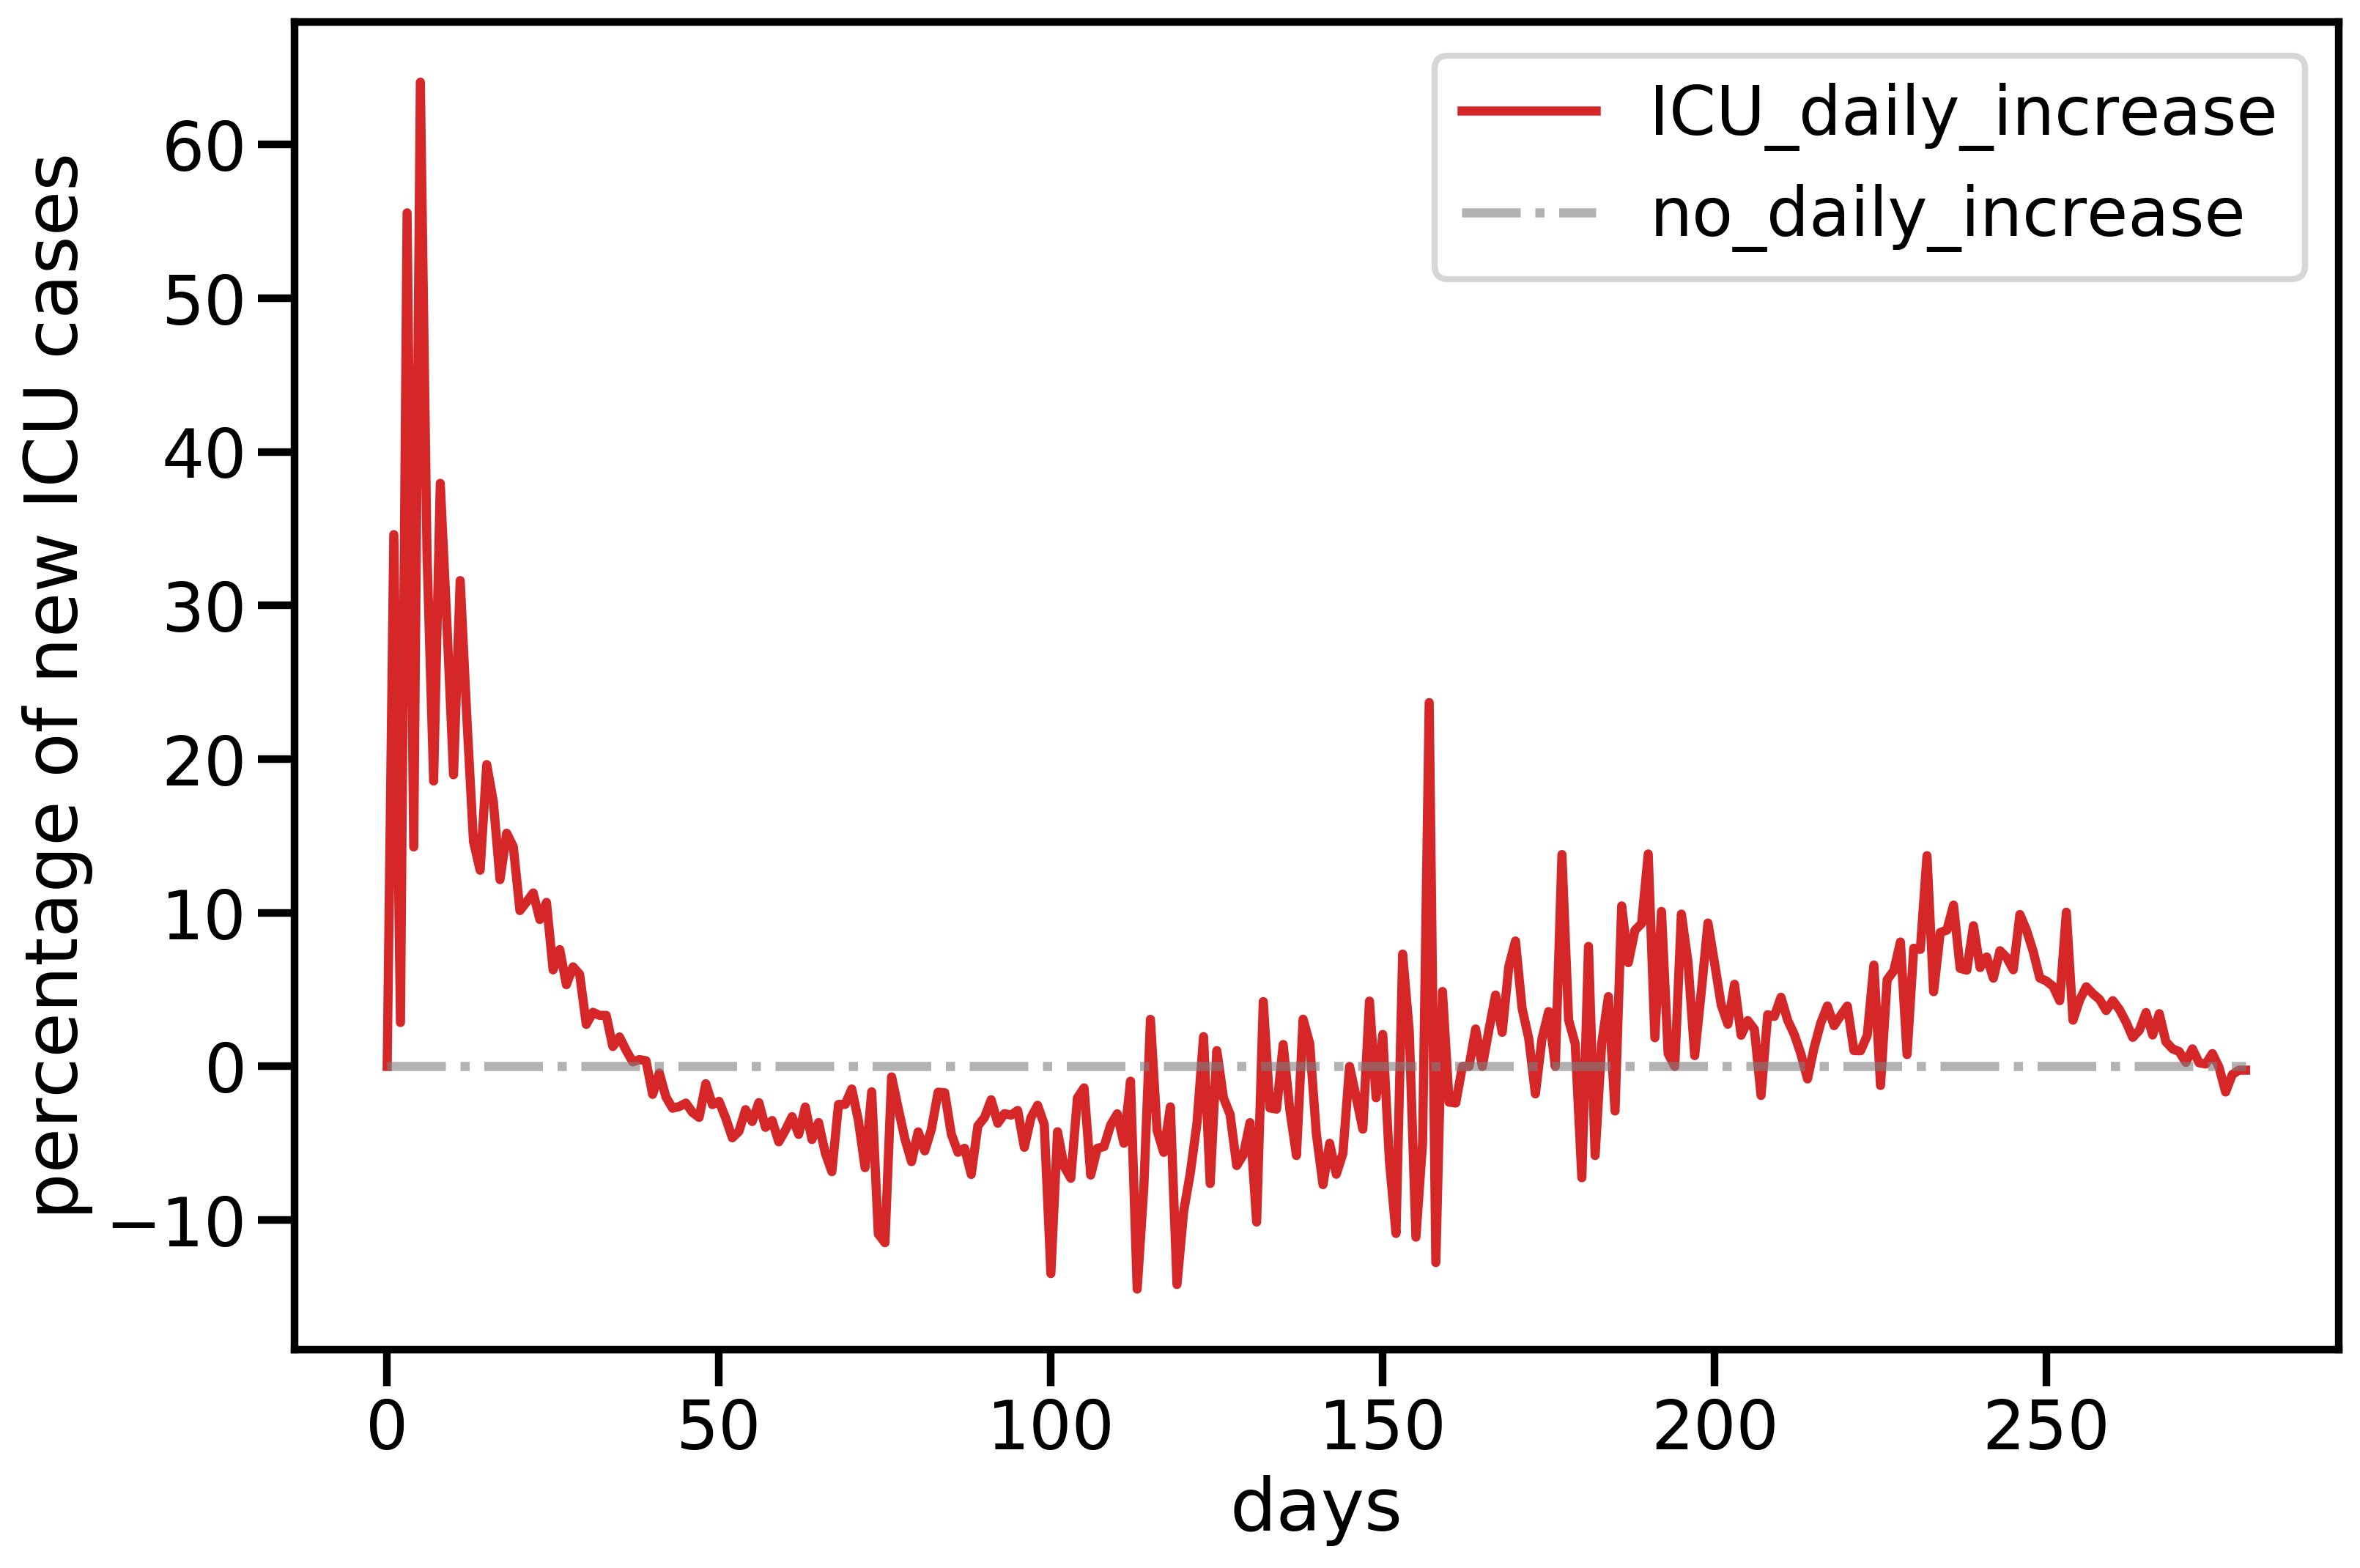

In [39]:
df['incremento_ICU_relativo_percentuale'].plot(label='ICU_daily_increase', color='#d62728')
plt.plot(np.repeat(0, len(df)), label='no_daily_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

# plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of new ICU cases')

plt.legend()

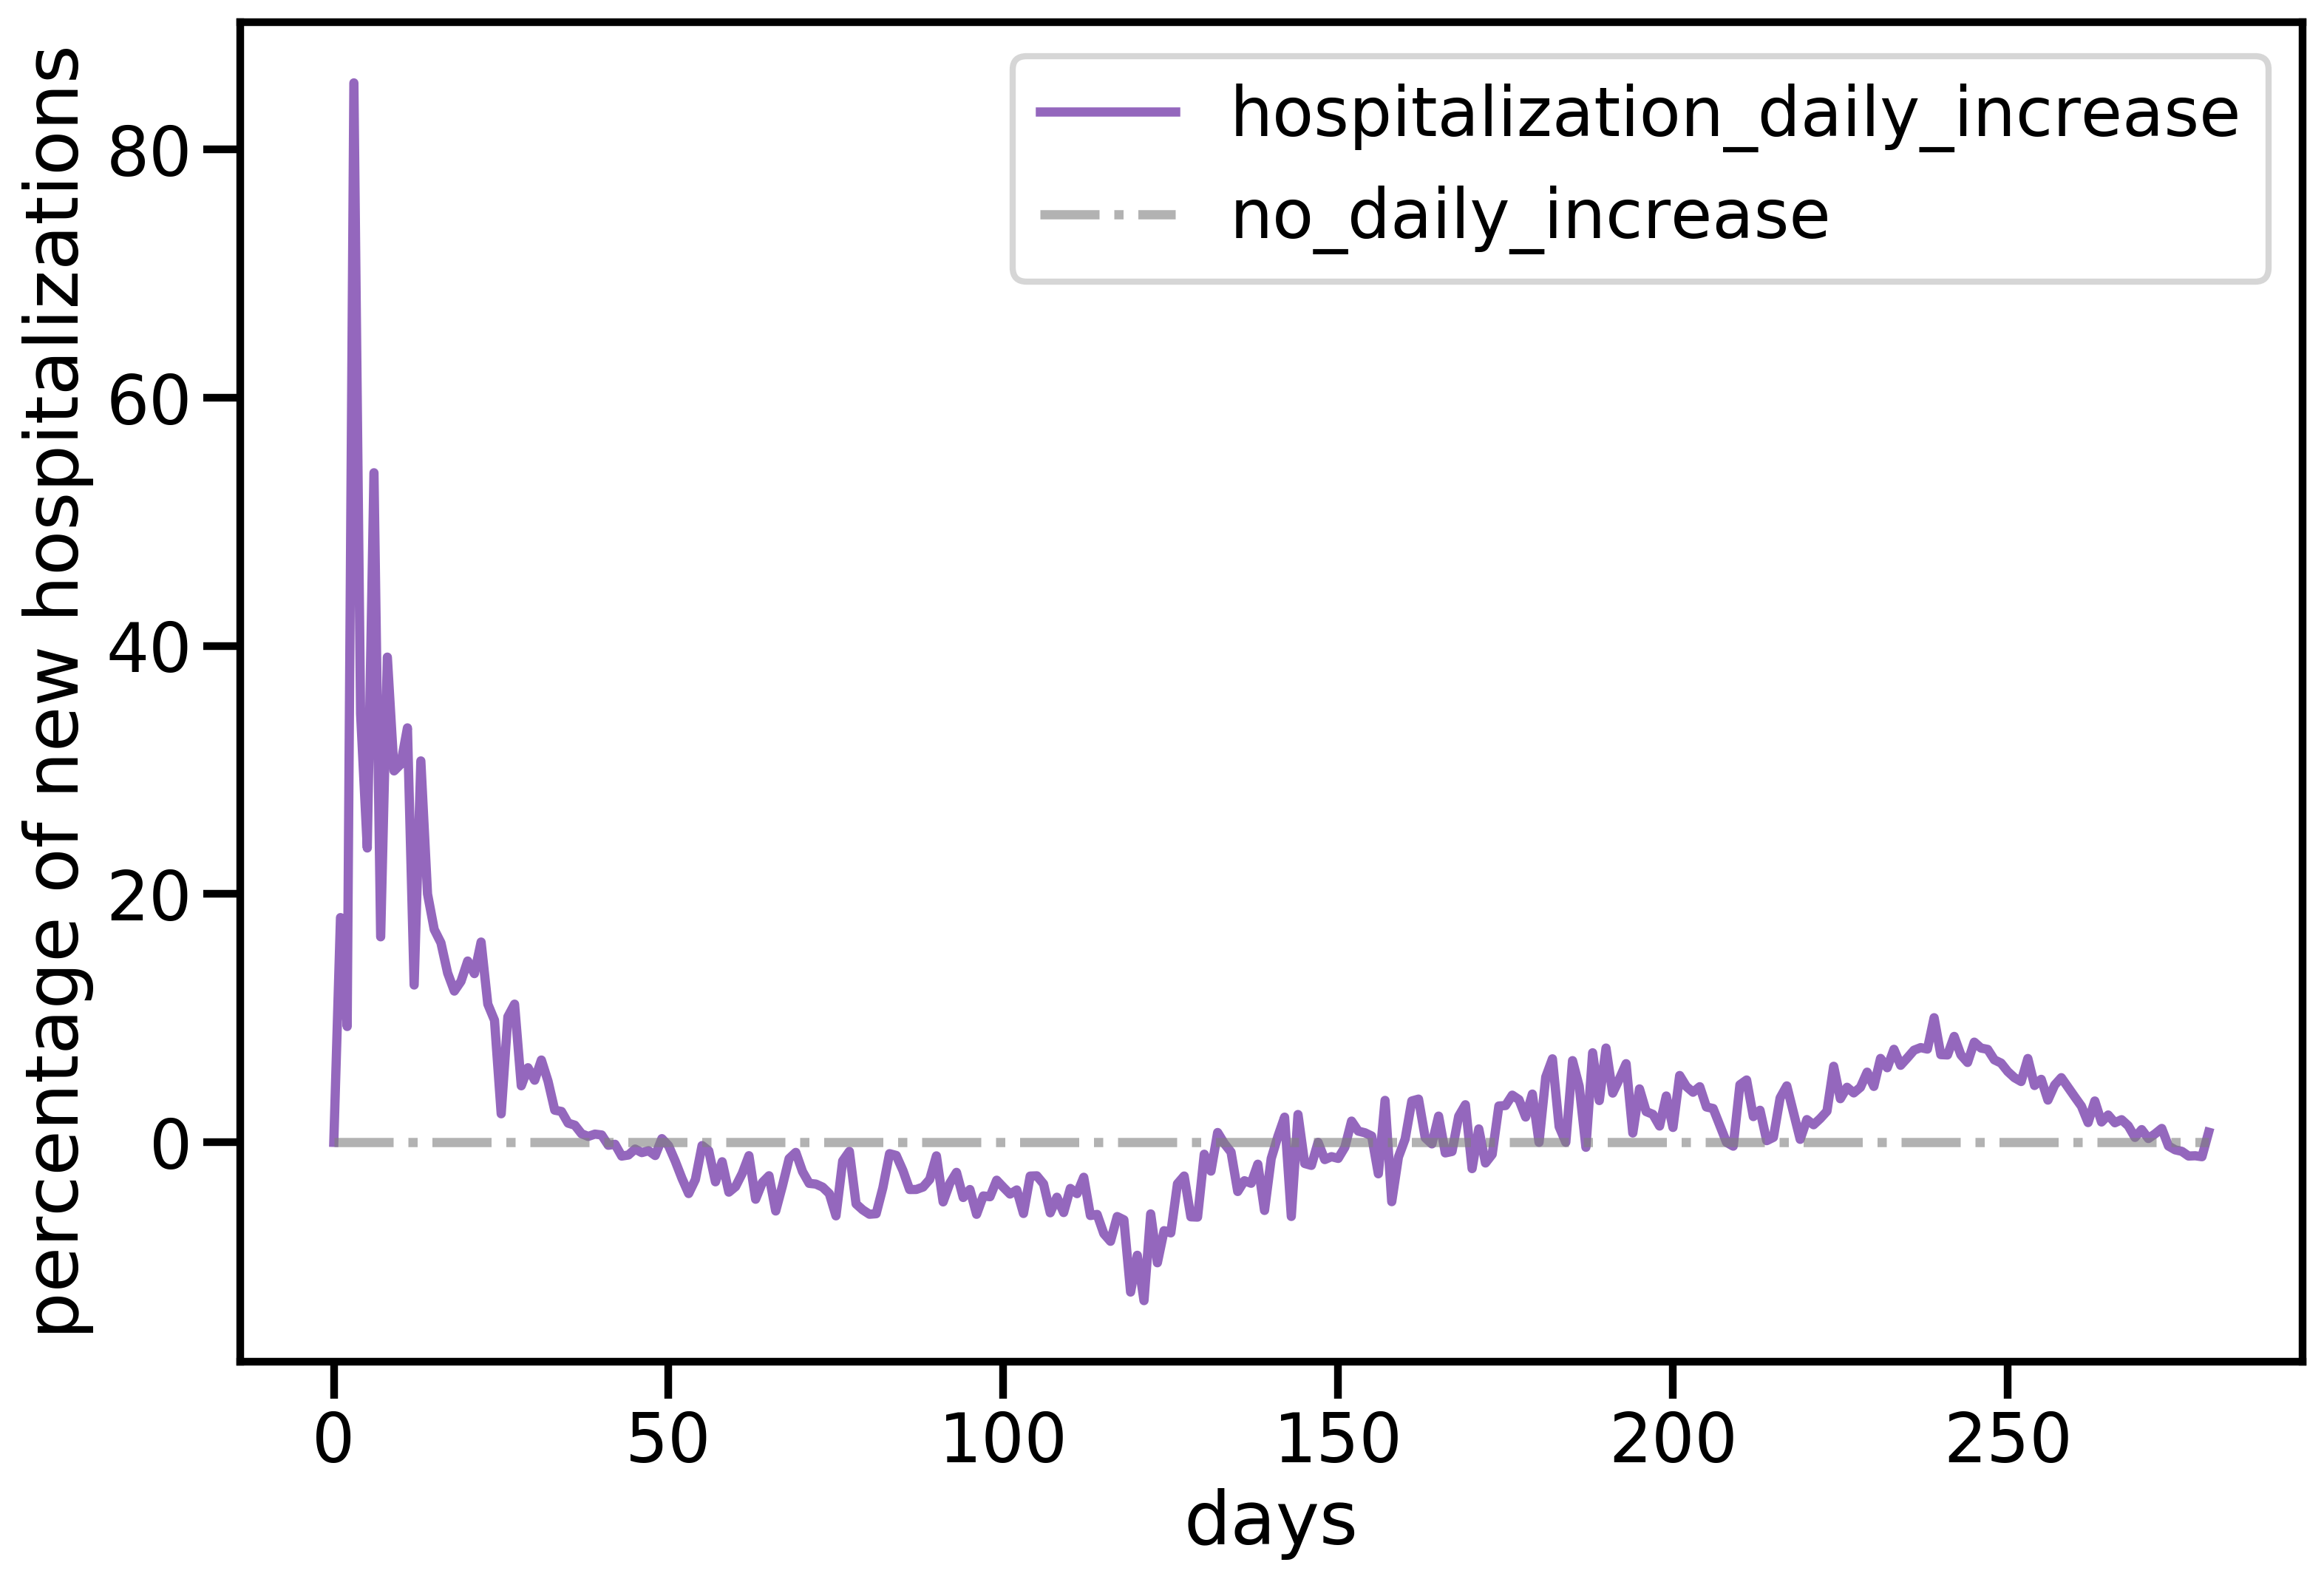

In [40]:
df['incremento_ospitalizzati_relativo_percentuale'].plot(label='hospitalization_daily_increase', color='#9467bd')
plt.plot(np.repeat(0, len(df)), label='no_daily_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

# plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of new hospitalizations')



plt.legend()

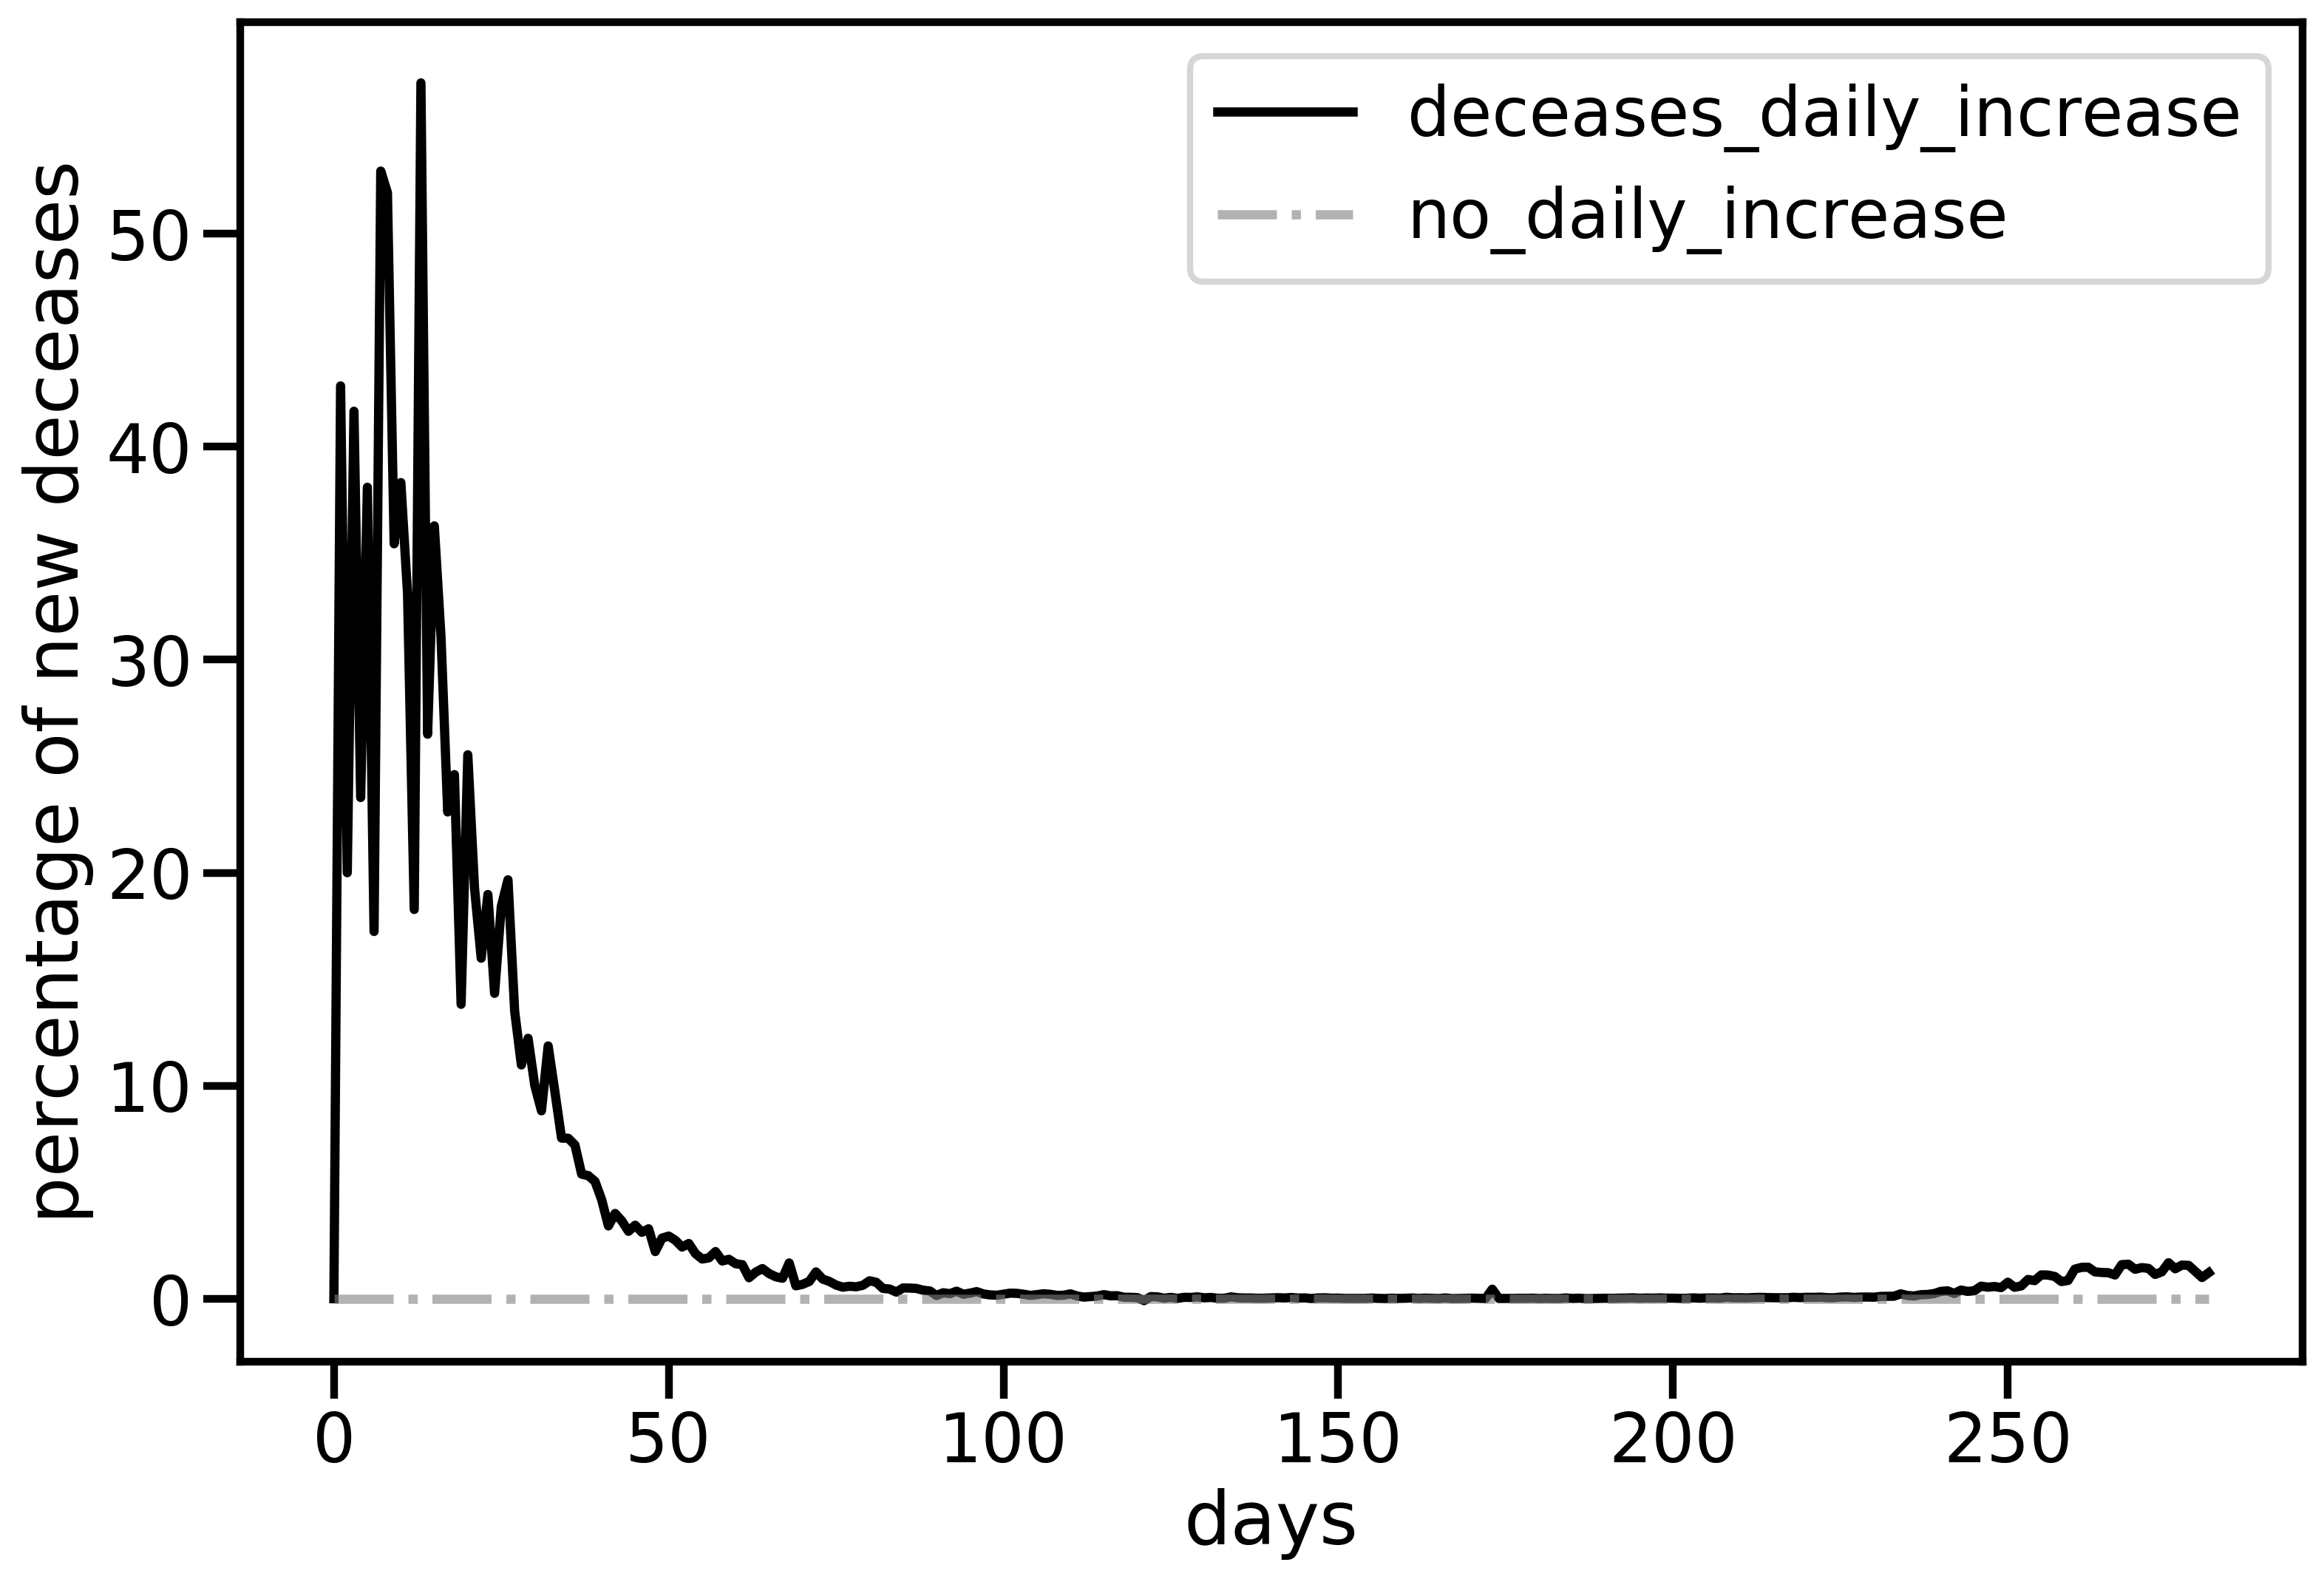

In [41]:
df['incremento_decessi_relativo_percentuale'].plot(label='deceases_daily_increase', color='black')
plt.plot(np.repeat(0, len(df)), label='no_daily_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

plt.xlabel('days')
plt.ylabel('percentage of new deceases')

plt.legend()

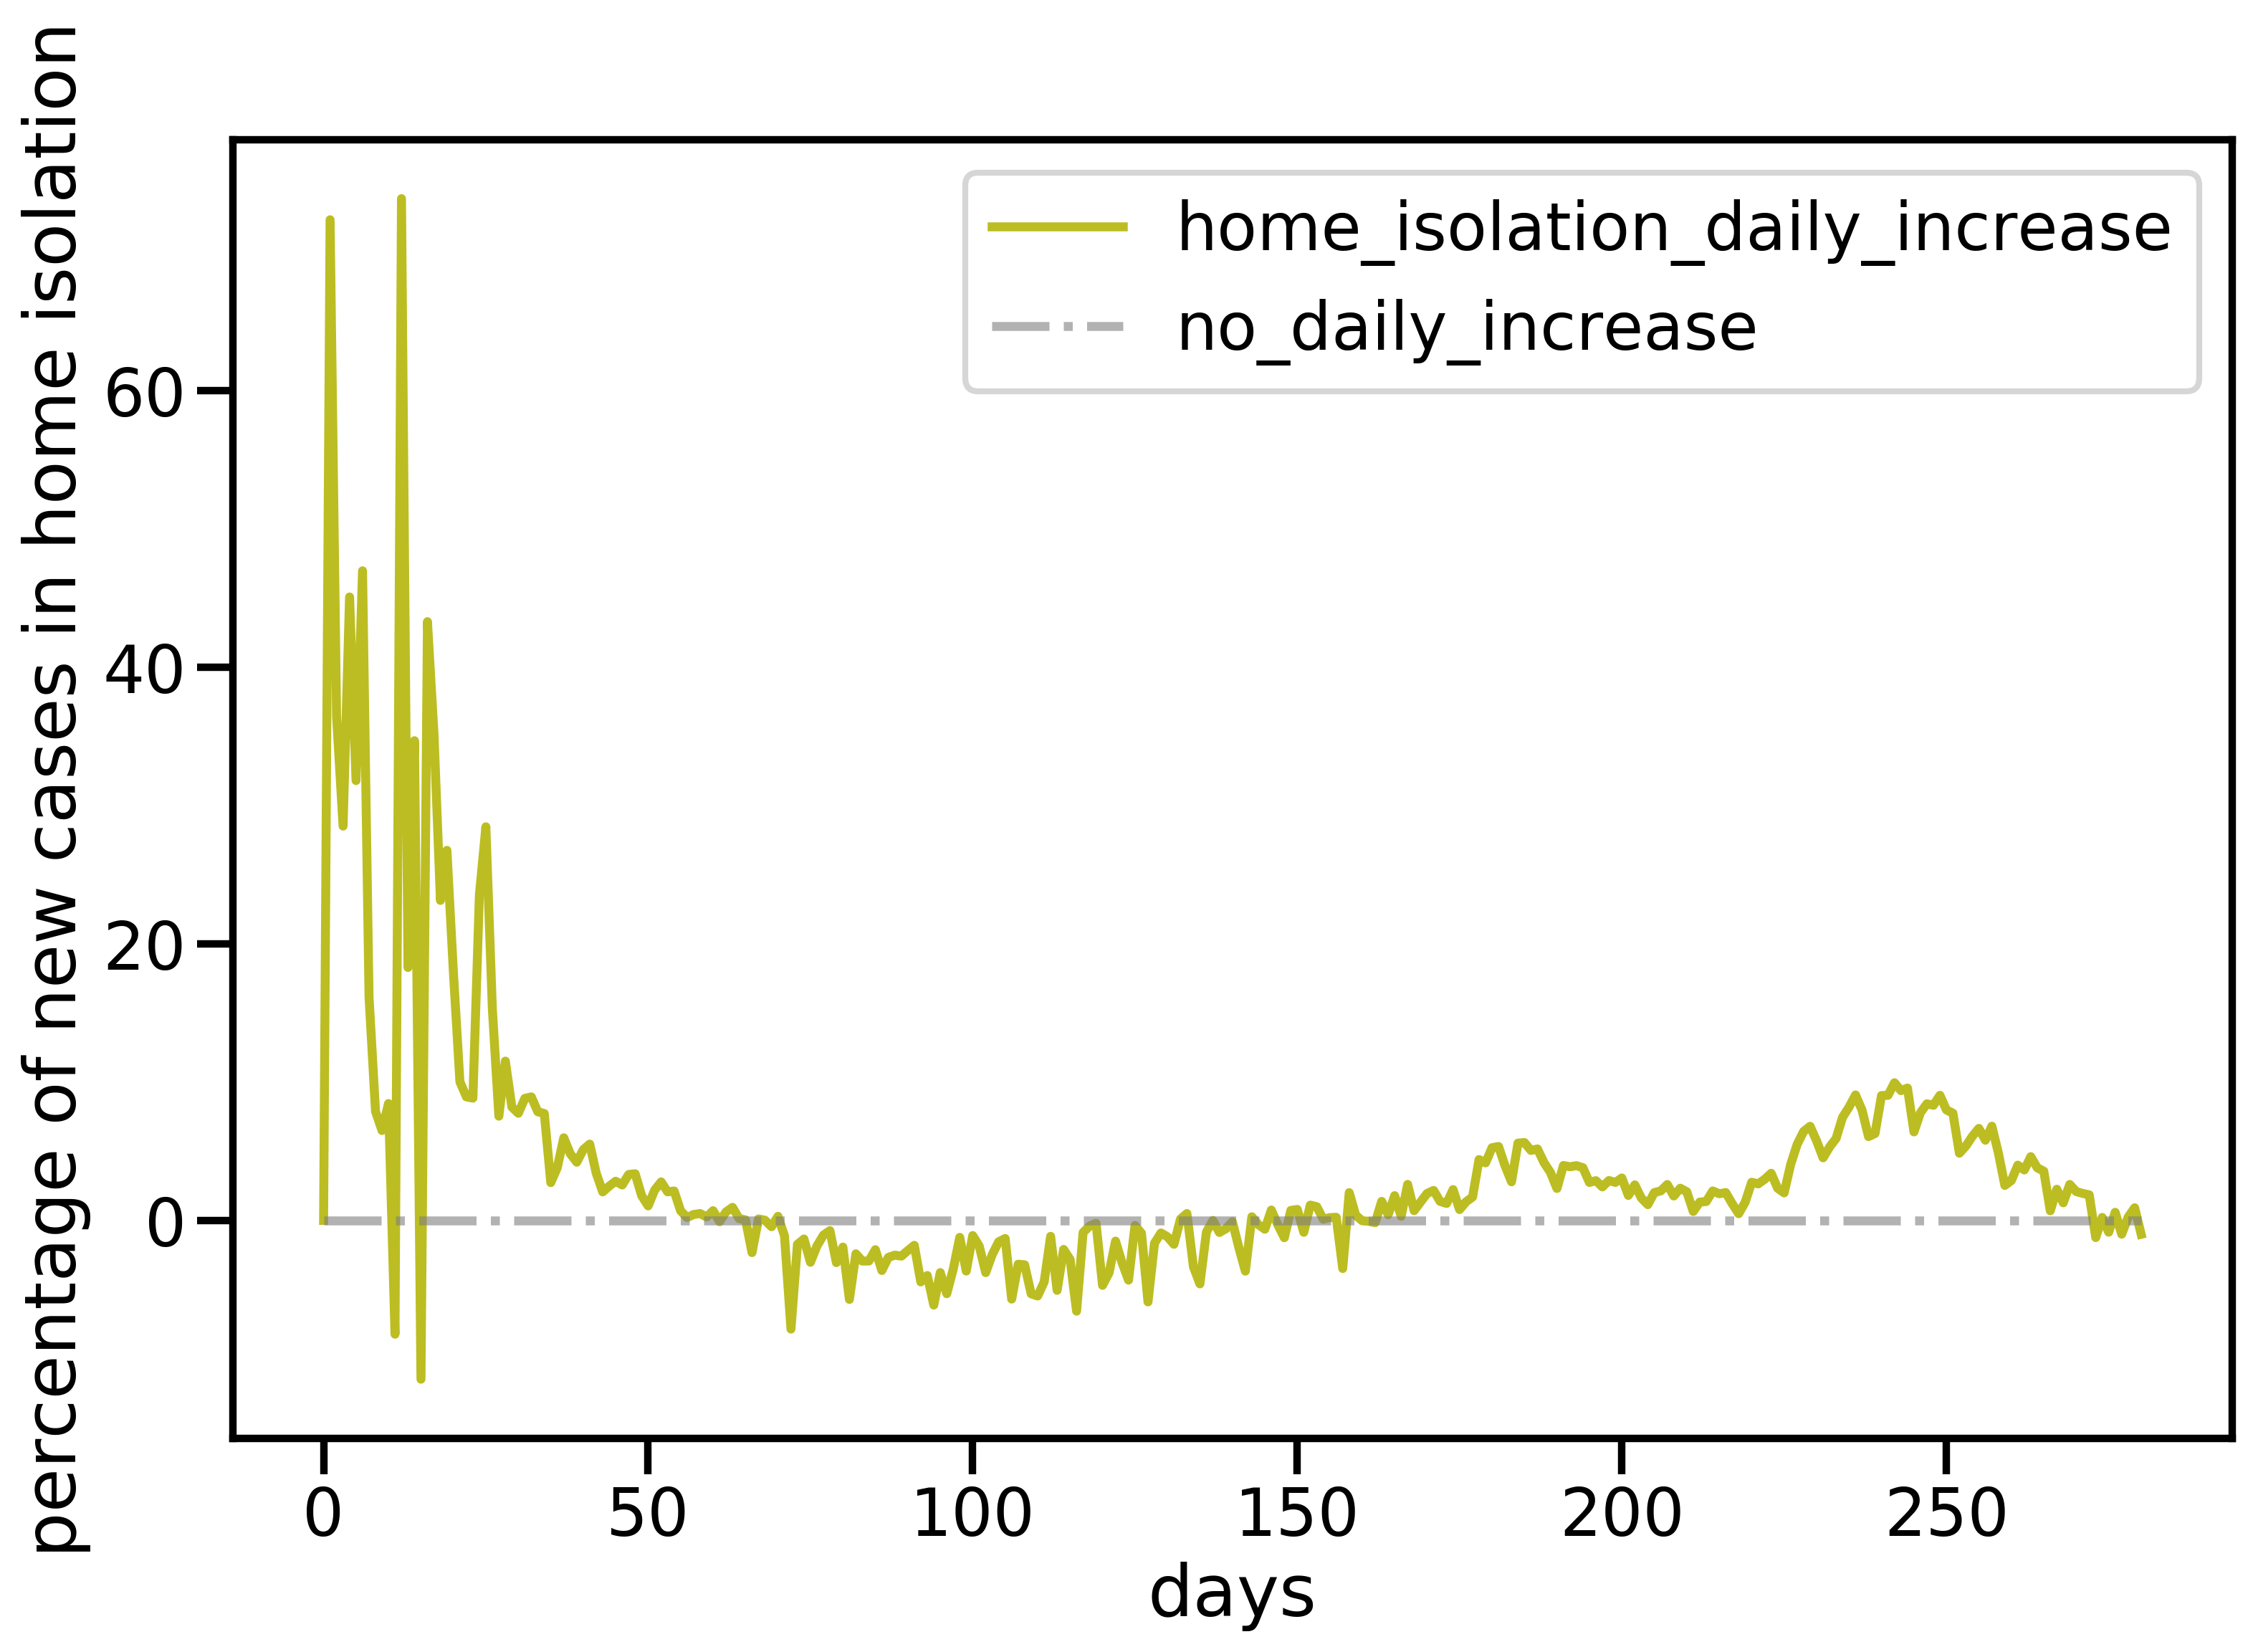

In [42]:
df['incremento_isolamento_domiciliare_relativo_percentuale'].plot(label='home_isolation_daily_increase', color='#bcbd22')
plt.plot(np.repeat(0, len(df)), label='no_daily_increase', linestyle='-.', color="#7f7f7f", alpha=0.6)

# plt.ylim(0,100)

plt.xlabel('days')
plt.ylabel('percentage of new cases in home isolation')

plt.legend()